# 중간고사 과제
전 세계 국가들의 각종 지표를 데이터로 삼고 1인당 GDP를 레이블로 삼는다.<br>

수집된 지표들은 지리, 정치, 사회 등등 다양한 분야의 통계로서 경제지표인 1인당 GDP와 '직접적인 연관'은 없지만<br>
간접적인 상호작용을 통해 경제 생활에 분명한 영향이 있음을 명시적으로 보여주는데 이 과제의 목적이 있다.

정확도 80% 이상의 모델을 만들고 각종 지표에 따라 1인당 GDP 순위를 예측한다.<br>
예측된 순위를 바탕으로 원하는만큼의 지표를 가진 가상국가의 1인당 GDP의 값 역시 예측 가능하다.

OECD국가들이나 기타 괜찮은 국가들의 평균 통계치들을 구하고<br> 
대한민국이 그에 미치지 못하는 지표는 어느 것인지 파악한다.<br>

그 지표들을 개선했을 때 대한민국의 1인당 GDP는 어느정도 선까지<br> 
올라갈 수 있을지 예측한다. 혹은 평균 이상의 지표들이 하락했을 때 인당 GDP에<br> 
미치는 영향이 클지 예측해본다.<br>

더불어 통일이 된다 가정하고 남한과 북한의 경제 규모를 합치고 기타 지표들을 <br>
대한민국 수준(잠재력을 북한이 아닌 대한민국의 기준으로 둔다)으로 끌어올렸을 때<br>
통일한국의 경제적인 위상이 어느정도일지도 예측해본다.

- 긴 시간이 걸릴 수 있고 중간에 컴퓨터가 예기치 못한 에러를 일으킬 가능성도 다분하므로 과정마다 엑셀파일을 저장하며 진행한다.

### 고려할 지표

면적, 인구, 평균수명, 출산율, 자살률, 실업률, 문해율, 에이즈감염자수, 위치지역<br>
언론자유, 민주주의지수, 부패지수,정치체제, 징병제 여부<br>
석유매장, 내륙국 여부<br>
인지도<br>
군사력<br>
최상위 교육기관 보유<br>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from selenium import webdriver
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
from tqdm import tqdm_notebook

In [3]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

## 우선 1인당 GDP 순위를 가져오도록 하자
다음은 위키백과의 '일인당_명목_국내_총생산순_나라_목록' 항목에 실린 순위이다. 2019년 국제통화기금의 발표를 출처로 삼았다.

In [5]:
url = 'https://ko.wikipedia.org/wiki/일인당_명목_국내_총생산순_나라_목록'
driver.get(url)

In [7]:
# 위키백과 확인 결과 마지막 순위는 남수단이므로 남수단이라는 이름이 나올 때까지 실행하자.
i=1
nation = ""
nation_list=[]
while nation != "남수단":
    info = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(1) > table > tbody > tr:nth-child({})'.format(i))
    nation_info = info.text.split(" ")
    nation = nation_info[1]
    nation_list.append(nation_info)
    i += 1
nation_list

[['1', '룩셈부르크', '113,196'],
 ['2', '스위스', '83,717'],
 ['—', '마카오', '81,151'],
 ['3', '노르웨이', '77,975'],
 ['4', '아일랜드', '77,771'],
 ['5', '카타르', '69,688'],
 ['6', '아이슬란드', '67,037'],
 ['7', '미국', '65,112'],
 ['8', '싱가포르', '63,987'],
 ['9', '덴마크', '59,795'],
 ['10', '오스트레일리아', '53,825'],
 ['11', '네덜란드', '52,368'],
 ['12', '스웨덴', '51,242'],
 ['13', '오스트리아', '50,023'],
 ['—', '홍콩', '49,334'],
 ['14', '핀란드', '48,869'],
 ['15', '산마리노', '47,280'],
 ['16', '독일', '46,564'],
 ['17', '캐나다', '46,213'],
 ['18', '벨기에', '45,176'],
 ['19', '이스라엘', '42,823'],
 ['20', '프랑스', '41,761'],
 ['21', '영국', '41,030'],
 ['22', '일본', '40,847'],
 ['23', '뉴질랜드', '40,634'],
 ['24', '아랍에미리트', '37,750'],
 ['25', '바하마', '33,261'],
 ['26', '이탈리아', '32,947'],
 ['—', '푸에르토리코', '31,538'],
 ['27', '대한민국', '31,431'],
 ['28', '몰타', '30,650'],
 ['29', '스페인', '29,961'],
 ['30', '쿠웨이트', '29,267'],
 ['31', '브루나이', '27,871'],
 ['32', '키프로스', '27,720'],
 ['33', '슬로베니아', '26,170'],
 ['34', '바레인', '25,273'],
 ['35', '타이완', '24,878'],

In [8]:
# ['180', '콩고', '민주', '공화국', '501'] 처럼 나라 이름이 잘 못 띄어쓰기 된 경우가 있으므로 이를 수정해주자.

for i in range(len(nation_list)):
    nation = nation_list[i]
    if len(nation) != 3:
        name = " ".join(nation[1:-1])
        rank = nation[0]
        GDP_per_capita = nation[-1]
        nation_list[i] = [rank,name,GDP_per_capita]        

In [9]:
nation_list

[['1', '룩셈부르크', '113,196'],
 ['2', '스위스', '83,717'],
 ['—', '마카오', '81,151'],
 ['3', '노르웨이', '77,975'],
 ['4', '아일랜드', '77,771'],
 ['5', '카타르', '69,688'],
 ['6', '아이슬란드', '67,037'],
 ['7', '미국', '65,112'],
 ['8', '싱가포르', '63,987'],
 ['9', '덴마크', '59,795'],
 ['10', '오스트레일리아', '53,825'],
 ['11', '네덜란드', '52,368'],
 ['12', '스웨덴', '51,242'],
 ['13', '오스트리아', '50,023'],
 ['—', '홍콩', '49,334'],
 ['14', '핀란드', '48,869'],
 ['15', '산마리노', '47,280'],
 ['16', '독일', '46,564'],
 ['17', '캐나다', '46,213'],
 ['18', '벨기에', '45,176'],
 ['19', '이스라엘', '42,823'],
 ['20', '프랑스', '41,761'],
 ['21', '영국', '41,030'],
 ['22', '일본', '40,847'],
 ['23', '뉴질랜드', '40,634'],
 ['24', '아랍에미리트', '37,750'],
 ['25', '바하마', '33,261'],
 ['26', '이탈리아', '32,947'],
 ['—', '푸에르토리코', '31,538'],
 ['27', '대한민국', '31,431'],
 ['28', '몰타', '30,650'],
 ['29', '스페인', '29,961'],
 ['30', '쿠웨이트', '29,267'],
 ['31', '브루나이', '27,871'],
 ['32', '키프로스', '27,720'],
 ['33', '슬로베니아', '26,170'],
 ['34', '바레인', '25,273'],
 ['35', '타이완', '24,878'],

In [10]:
GDP_df = pd.DataFrame(nation_list,columns=['순위','국가','1인당_GDP'])
GDP_df.head()

,순위,국가,1인당_GDP
0,1,룩셈부르크,"113,196"
1,2,스위스,"83,717"
2,—,마카오,"81,151"
3,3,노르웨이,"77,975"
4,4,아일랜드,"77,771"


## 유엔 회원국의 리스트 수집
마카오,홍콩 등 정식 국가가 아닌 경우가 포함되어 있으므로 이를 모두 제외하도록 하자. 유엔 회원국들을 기준 삼아 데이터를 수집하도록 하겠다.

In [11]:
url = 'https://ko.wikipedia.org/wiki/유엔_회원국'
driver.get(url)

In [12]:
driver.find_element_by_css_selector('#mw-content-text > div > table:nth-child(9) > tbody > tr:nth-child(2) > td:nth-child(1) > a').text

'가나'

In [13]:
i=1
nation = ""
UN_nations=[]
while nation != "헝가리":
    nation = driver.find_element_by_css_selector('#mw-content-text > div > table:nth-child(9) > tbody > tr:nth-child({}) > td:nth-child(1) > a'.format(i+1)).text
    UN_nations.append(nation)
    i+=1

In [14]:
UN_nations[:4]

['가나', '가봉', '가이아나', '감비아']

In [15]:
len(UN_nations)

193

193개의 회원국을 알아냈다. 정보를 얻기위해 영문명으로 검색하는 것이 더 정확한 경우도 있으니 같이 수집해보도록 하자.<br>
영문명은 단순하게 네이버에 국가명을 검색한 후 나오는 이름을 얻도록 한다.

In [16]:
def nation_in_English(nation):
    url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query={}'.format(nation)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    name = soup.select('dl.info_naflag>dt')[0].text.split(" ",1)[1]
    return name    

In [17]:
nation_in_English('프랑스')

'France'

In [18]:
nation_in_English("영국")

'United Kingdom'

In [19]:
nation_in_English("남아프리카공화국")

'Republic of South Africa'

In [20]:
# 띄어쓰기 여부에 관계 없이 동일한 결과를 보여준다.
nation_in_English("남아프리카 공화국")

'Republic of South Africa'

In [21]:
# UN 회원국의 영문명을 전부 수집하도록 하자
# 페이지를 바꿔가며 정보를 수집하다보디 약간의 시간이 걸릴 수 있다. 
# tqdm노트북은 매 순환 과정을 표시해주므로 시간을 체크하기도 좋고 에러가 났을 때 고치기도 쉽다.

UN_list = []
for nation in tqdm_notebook(UN_nations):
    name = nation_in_English(nation)
    UN_list.append([nation,name])

In [22]:
UN_df = pd.DataFrame(UN_list,columns=['국가','영문'])
UN_df.head()

,국가,영문
0,가나,Ghana
1,가봉,Gabon
2,가이아나,Guyana
3,감비아,Republic of The Gambia
4,과테말라,Guatemala


GDP 데이터와 UN 데이터에 공통적으로 들어가는 나라들만을 이용하도록 하겠다.<br>
타이완 등은 유엔 회원국이 아니기 때문에 누락되어있고 북한 등은 GDP가 잘 집계되지 않아 마찬가지로 해당 순위에 빠져있다.

In [25]:
# 가끔 국가명이 똑같이 써있지 않아 문제가 생기는 경우가 있다. GDP가 집계된 나라 중 UN회원국에 들어있지 않은 나라들을 출력한다.

un_list = list(UN_df.국가)
GDP_df[GDP_df['국가'].isin(un_list)==False]

,순위,국가,1인당_GDP
2,—,마카오,"81,151"
14,—,홍콩,"49,334"
28,—,푸에르토리코,"31,538"
37,35,타이완,"24,878"
68,66,중국,"10,099"
109,107,코소보,"4,442"


마카오, 홍콩 등은 국가가 아니고 타이완의 경우 양안문제로 UN 회원국이 아니다. 코소보의 경우 역시 분쟁을 겪다가 독립한지 얼마 안된 신생국가로서 UN의 정식 국가는 아닌 상황이다.푸에르토리코의 경우 미국의 자치령으로서 UN국가가 아니다.

중국이 빠져있는 것은 좀 의외인데 아마 위키백과의 UN회원국 문서에 '중화인민공화국'으로 등재되어있기에 그런 듯 하다.

In [26]:
'중화인민공화국' in un_list

True

In [ ]:
# 중화인민공화국을 따로 추가해주도록 하자 

In [27]:
first_result = pd.merge(GDP_df,UN_df,on='국가',how='inner')
first_result

,순위,국가,1인당_GDP,영문
0,1,룩셈부르크,"113,196",Luxembourg
1,2,스위스,"83,717",Switzerland
2,3,노르웨이,"77,975",Norway
3,4,아일랜드,"77,771",Ireland
4,5,카타르,"69,688",Qatar
...,...,...,...,...
180,184,니제르,405,Niger
181,185,말라위,371,Malawi
182,186,에리트레아,343,Eritrea
183,187,부룬디,310,Burundi


In [28]:
first_result.isnull().sum()

순위         0
국가         0
1인당_GDP    0
영문         0
dtype: int64

In [40]:
first_result = first_result.append({'순위':66,'국가':'중화인민공화국','1인당_GDP':'10,099','영문':'China'},ignore_index=True)
first_result

,순위,국가,1인당_GDP,영문
0,1,룩셈부르크,"113,196",Luxembourg
1,2,스위스,"83,717",Switzerland
2,3,노르웨이,"77,975",Norway
3,4,아일랜드,"77,771",Ireland
4,5,카타르,"69,688",Qatar
...,...,...,...,...
181,185,말라위,371,Malawi
182,186,에리트레아,343,Eritrea
183,187,부룬디,310,Burundi
184,188,남수단,275,Republic of South Sudan


In [48]:
# 그대로 냅둬도 큰 상관은 없지만 보기 좋은 모양으로 만들기 위해 순위에 따라 다시 정렬해준다.
# 단 순위 항목이 숫자가 아니라 문자열이므로 지금 상태로는 만족스러운 결과물을 얻을 수 없다. 정수형으로 바꾼 뒤 정렬을 하기로 한다.

for i in range(len(first_result)):
    first_result.iloc[i,0] = int(first_result.iloc[i,0])


In [76]:
first_result.sort_values(by='순위',inplace=True)
# 중국에 대한 index가 이상한 상황이므로 인덱스를 재구성
first_result.reset_index(drop=True,inplace=True)

In [83]:
first_result

,순위,국가,1인당_GDP,영문
0,1,룩셈부르크,"113,196",Luxembourg
1,2,스위스,"83,717",Switzerland
2,3,노르웨이,"77,975",Norway
3,4,아일랜드,"77,771",Ireland
4,5,카타르,"69,688",Qatar
...,...,...,...,...
181,184,니제르,405,Niger
182,185,말라위,371,Malawi
183,186,에리트레아,343,Eritrea
184,187,부룬디,310,Burundi


In [84]:
first_result.to_csv('중간과정/first_result.csv',index=False)
first_result.to_excel('중간과정/first_result2.xlsx',index=False)

# 인지도 조사
영문으로 국가를 검색시 확인되는 결과의 개수를 해당 국가의 세계적인 인지도의 기준으로 삼도록 하자.(2020년 4월 15일 기준)

In [4]:
first_result = pd.read_excel('중간과정/first_result2.xlsx')
first_result

,순위,국가,1인당_GDP,영문
0,1,룩셈부르크,"113,196",Luxembourg
1,2,스위스,"83,717",Switzerland
2,3,노르웨이,"77,975",Norway
3,4,아일랜드,"77,771",Ireland
4,5,카타르,"69,688",Qatar
...,...,...,...,...
181,184,니제르,405,Niger
182,185,말라위,371,Malawi
183,186,에리트레아,343,Eritrea
184,187,부룬디,310,Burundi


In [5]:
a='https://www.google.com/search?sxsrf=ALeKk03cqcUIPRVcCVI82rKc2iB1jNrw_A%3A1586853716140&ei=VHeVXpGSCJXmwQOz2YLYCA&q={}&oq={}&gs_lcp=CgZwc3ktYWIQAzIECCMQJzICCAAyBQgAEIMBMgUIABCDATICCAAyBQgAEIMBMgIIADICCAAyBQgAEIMBMgIIADoECAAQRzoECAAQCkocCBcSGDBnMTkxZzE3NWc5MGcxODJnMTc1ZzE3MUoRCBgSDTBnMWcxZzJnMWcxZzFQphxYhSlgrC1oAHABeACAAbsBiAGQCJIBAzAuNpgBAKABAaoBB2d3cy13aXo&sclient=psy-ab&ved=0ahUKEwiRjL7gwufoAhUVc3AKHbOsAIsQ4dUDCAw&uact=5'
b='https://www.google.com/search?sxsrf=ALeKk02Stcf1YOWx8JqDrQY3szxA2H3PXg%3A1586853723194&ei=W3eVXsG5C5CB-Qbq7JnQDg&q={}&oq={}&gs_lcp=CgZwc3ktYWIQAzIECAAQQzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoECCMQJzoKCAAQgwEQFBCHAjoFCAAQgwE6BggAEAcQHjoECAAQAzoGCCMQJxATOgcIABCDARBDSi0IFxIpMGcxNTdnMTY4ZzQxM2c4MDBnNjI1ZzIxOGcxODJnMTU0ZzE0NGcxNjFKGQgYEhUwZzFnMWcxZzFnMWc0ZzFnMWcxZzVQkOAEWN-oBWC1qwVoAHAAeACAAZoGiAGEIZIBDjAuMTMuMC4xLjEuMS4xmAEAoAEBqgEHZ3dzLXdpeg&sclient=psy-ab&ved=0ahUKEwiB0-zjwufoAhWQQN4KHWp2BuoQ4dUDCAw&uact=5'

In [6]:
a==b

False

위의 a,b는 각각 구글에 'France','United kingdom'을 검색한 url에서 해당 국가의 단어만 {}로 대체한 문자열들이다.<br>
그러나 a,b가 서로 일치하지 않으므로 단순히 국가명을 url에 이어붙이는 방식으로는 구글 검색을 이용하기 어려울 듯하므로 직접 검색엔진에 단어를 입력하는 방식을 쓰도록 하자.

In [7]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

In [ ]:
url = 'http://www.google.co.kr'  # 구글 첫 화면의 url
driver.get(url)

### 언어 설정을 영어로 바꾸고 하시오!

In [15]:
searching = driver.find_element_by_name("q")
searching.clear()
searching.send_keys("France")  # 확인해보니 띄어쓰기는 구분하되 대소문자는 구분하지 않는다.
searching.submit()
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [16]:
searching_result = soup.select('div#result-stats')[0].text
searching_result

'About 5,010,000,000 results (0.84 seconds)\xa0'

In [17]:
searching_result.find('t')

4

In [18]:
searching_result.find('r')

20

In [19]:
int(searching_result[6:19].replace(",",""))

5010000000

In [20]:
def get_awareness(nation):
    url = 'http://www.google.co.kr'
    driver.get(url)
    searching = driver.find_element_by_name("q")
    searching.clear()
    searching.send_keys(nation)
    searching.submit()
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    
    searching_result = soup.select('div#result-stats')[0].text
    start_num = searching_result.find('t')
    end_num = searching_result.find('r')
    awareness = int(searching_result[start_num+2:end_num-1].replace(",",""))
    return awareness

In [21]:
get_awareness('Republic of South Sudan')

294000000

In [22]:
get_awareness('Korea')

1610000000

In [23]:
# 이제 해당 함수를 이용해 구글 자료수를 수집할 것인데 정식 국가명이 오히려 거추장스러워 잘 쓰이지 않는 경우가 있다.

first_result['영문']

0                   Luxembourg
1                  Switzerland
2                       Norway
3                      Ireland
4                        Qatar
                ...           
181                      Niger
182                     Malawi
183                    Eritrea
184                    Burundi
185    Republic of South Sudan
Name: 영문, Length: 186, dtype: object

In [28]:
complicated_name=[]
for i,name in enumerate(first_result['영문']):
    if 'of' in name:
        complicated_name.append((i,name))
complicated_name

[(6, 'United States of America'),
 (26, 'Republic of Korea'),
 (74, 'Commonwealth of Dominica'),
 (86, 'Republic of Suriname'),
 (88, 'Republic of South Africa'),
 (107, 'Kingdom of Eswatini'),
 (131, 'Bolivarian Republic of Venezuela'),
 (133, 'Republic of the Congo'),
 (144, "Republic of Cote d'Ivoire"),
 (155, 'Republic of the Union of Myanmar'),
 (170, 'Republic of The Gambia'),
 (177, 'Democratic Republic of the Congo'),
 (185, 'Republic of South Sudan')]

보통 ~~공화국 이런 식의 정식국명은 잘 검색되지 않을듯 하다. <br>
가령 한국을 알고 싶어하는 구글 이용자가 Republic of Korea보다는 Korea 혹은 South korea등으로 검색하리라는 것은 상식적으로 납득이 가능하다.<br>
단 'Korea'와 'South Korea'의 검색 결과들에는 교집합이 상당히 많을 것이므로 각 국가마다 한가지 검색키워드만을 적용하도록 한다.

In [25]:
# of가 들어잇는 국명은 몇개 되지 않으므로 손으로 하나씩 수정해줘도 괜찮을 듯 하다.
# 약간의 주관이 개입된다.

temporary_list = list(first_result['영문'].values)
temporary_list[6] = 'USA'
# 북한을 목적으로 하는 결과도 물론 있겠지만 남북한이 같이 엮이는 경우가 많으므로 인지도의 측면에서 굳이 South를 붙일 필요는 없어보인다.
temporary_list[26] = 'Korea'
temporary_list[74] = 'Dominica'
temporary_list[86] = 'Suriname'
# 남아공은 그냥 내버려두도록 하자.
temporary_list[107] = 'Eswatini'
temporary_list[131] = 'Venezuela'
# 콩고의 경우 콩고민주공화국과 콩고공화국이 별개의 국가이다. 단 콩고하면 보통 민주콩고를 떠올리기에 민주콩고만 수정해주도록 하겠다.
temporary_list[144] = "Cote d'Ivoire"
temporary_list[155] = "Myanmar"
temporary_list[170] = "Gambia"
temporary_list[177] = "Congo"
temporary_list[185] = "South Sudan"


In [31]:
complicated_name2=[]
for i,name in enumerate(first_result['영문']):
    if 'of' not in name:
        if " " in name:
            complicated_name2.append((i,name))
complicated_name2

[(14, 'San Marino'),
 (20, 'United Kingdom'),
 (22, 'New Zealand'),
 (23, 'United Arab Emirates'),
 (30, 'Brunei Darussalam'),
 (35, 'Czech Republic'),
 (37, 'Saudi Arabia'),
 (41, 'Saint Kitts and Nevis'),
 (43, 'Antigua and Barbuda'),
 (50, 'Trinidad and Tobago'),
 (57, 'Costa Rica'),
 (62, 'Saint Lucia'),
 (70, 'Equatorial Guinea'),
 (73, 'Dominican Republic'),
 (80, 'Saint Vincent and the Grenadines'),
 (91, 'Bosnia and Herzegovina'),
 (110, 'El Salvador'),
 (112, 'Sri Lanka'),
 (113, 'Marshall Is.'),
 (117, 'Cape Verde'),
 (128, 'Papua New Guinea'),
 (134, 'East Timor'),
 (135, 'Solomon Is.'),
 (140, 'Sao Tome and Principe'),
 (167, 'Guinea Bissau'),
 (171, 'Burkina Faso'),
 (175, 'Sierra Leone'),
 (180, 'Central African Republic')]

In [32]:
# 위에서 거른 것들 외에 띄어쓰기가 포함된 국가 중에는 브루나이 다루살람, 체코 공화국 정도만 수정해주면 될 듯 하다.

temporary_list[35] = "Czech"
temporary_list[30] = "Brunei"


# 추가로 영국의 경우도 수정을 고려했으나 United Kingdom, Britain, England 중 United Kingdom의 결과수가 가장 많으므로 수정하지 않도록 한다.
# 스위스 역시 수정을 고려했으나 Swiss보다 Switzerland의 결과수가 많으므로 내버려두도록 한다.

### 다시 한번 주의) 크롤링 페이지의 환경설정을 영어로 바꿔놓도록 한다.

In [37]:
# 간혹 컴퓨터가 반복되는 크롤링 작업에 버그로 인지해 임의로 중단시키는 경우가 있다. 
# 그러므로 186개의 페이지를 한번에 찾지 말고 4번에 걸쳐서 하도록 한다. 어차피 똑같은 코드니까 더 복잡해지는 것은 없다.

awareness_list=[]
for nation in tqdm_notebook(temporary_list[:45]):
    awareness = get_awareness(nation)
    time.sleep(0.5)
    awareness_list.append(awareness)

In [39]:
awareness_list2=awareness_list
for nation in tqdm_notebook(temporary_list[45:90]):
    awareness = get_awareness(nation)
    time.sleep(0.5)
    awareness_list2.append(awareness)

In [40]:
awareness_list3=awareness_list2
for nation in tqdm_notebook(temporary_list[90:137]):
    awareness = get_awareness(nation)
    time.sleep(0.5)
    awareness_list3.append(awareness)

In [41]:
awareness_list4=awareness_list3
for nation in tqdm_notebook(temporary_list[137:]):
    awareness = get_awareness(nation)
    time.sleep(0.5)
    awareness_list4.append(awareness)

In [43]:
len(awareness_list4)

186

In [42]:
awareness_list4[:5]

[515000000, 712000000, 572000000, 1090000000, 717000000]

In [44]:
# 당연한 얘기지만 인지도는 해당 DataFrame의 국가 순서로 수집되었다.

first_result['인지도'] = awareness_list4
first_result

,순위,국가,1인당_GDP,영문,인지도
0,1,룩셈부르크,"113,196",Luxembourg,515000000
1,2,스위스,"83,717",Switzerland,712000000
2,3,노르웨이,"77,975",Norway,572000000
3,4,아일랜드,"77,771",Ireland,1090000000
4,5,카타르,"69,688",Qatar,717000000
...,...,...,...,...,...
181,184,니제르,405,Niger,294000000
182,185,말라위,371,Malawi,285000000
183,186,에리트레아,343,Eritrea,187000000
184,187,부룬디,310,Burundi,326000000


In [46]:
first_result.to_csv('중간과정/second_result.csv',index=False)
first_result.to_excel('중간과정/second_result2.xlsx',index=False)

# 기타 자료 수집
신뢰할 수 있는 지표를 최대한 많이 모을 수록 예측 모델이 정교해진다.

In [3]:
df = pd.read_excel('중간과정/second_result2.xlsx')
df

,순위,국가,1인당_GDP,영문,인지도
0,1,룩셈부르크,"113,196",Luxembourg,515000000
1,2,스위스,"83,717",Switzerland,712000000
2,3,노르웨이,"77,975",Norway,572000000
3,4,아일랜드,"77,771",Ireland,1090000000
4,5,카타르,"69,688",Qatar,717000000
...,...,...,...,...,...
181,184,니제르,405,Niger,294000000
182,185,말라위,371,Malawi,285000000
183,186,에리트레아,343,Eritrea,187000000
184,187,부룬디,310,Burundi,326000000


# 위치 지역
각 국가들이 어느 지역에 속해있는지 역시 중요할 것이다.<br>
유럽에 위치하고 있는 자체만으로 주변국과의 교역 등으로 아프리카 국가보다 우위를 선점할 가능성이 높을 것이다.

In [4]:
# 네이버 지식백과에서는 외교부 출처 유엔국들의 지역분류를 제공한다.
url ='https://terms.naver.com/entry.nhn?docId=5806481&cid=43163&categoryId=43163&expCategoryId=43163'

In [5]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

In [6]:
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [7]:
countries = soup.select('div.box_tbl>table')
len(countries)

5

In [8]:
group = {'아프리카권':0,'아시아권':1,'동유럽권':2,'중남미&카리브권':3,'서유럽권&기타':4}

In [9]:
country = countries[2].select('td')[0].text
country

'조지아'

In [10]:
grouped_df = pd.DataFrame([],columns=['국가','지역'])
ddd=[]
for k,v in group.items():
    country_list = countries[v].select('td')
    for country in country_list:
        grouped_df = grouped_df.append({'국가':country.text,'지역':k},ignore_index=True)
grouped_df

,국가,지역
0,가나,아프리카권
1,모로코,아프리카권
2,우간다,아프리카권
3,가봉,아프리카권
4,모리셔스,아프리카권
...,...,...
190,이스라엘,서유럽권&기타
191,핀란드,서유럽권&기타
192,모나코,서유럽권&기타
193,아이슬랜드,서유럽권&기타


In [11]:
# 몇가지 수정해주고싶은 지역이 있는데 같은 아시아권 내에서도 동아시아는 부유한 지역이므로 따로 분류하려고 한다.
# 미국,캐나다는 중남미가 아니라 서유럽권과 묶여있으므로 수정할 필요가 없다.

def repairing(df):
    cond1 = (df['국가'] == '대한민국')
    cond2 = (df['국가'] == '중국')
    cond3 = (df['국가'] == '일본')
    if cond1|cond2|cond3:
        df['지역']='동아시아'
    return df

In [12]:
grouped_df.apply(repairing,axis=1)

,국가,지역
0,가나,아프리카권
1,모로코,아프리카권
2,우간다,아프리카권
3,가봉,아프리카권
4,모리셔스,아프리카권
...,...,...
190,이스라엘,서유럽권&기타
191,핀란드,서유럽권&기타
192,모나코,서유럽권&기타
193,아이슬랜드,서유럽권&기타


In [13]:
grouped_df.groupby('지역').count()

,국가
지역,
동아시아,3
동유럽권,24
서유럽권&기타,30
아시아권,51
아프리카권,54
중남미&카리브권,33


In [14]:
# 이제 grouped_df와 미리 만들어둔 DataFrame을 병합해야하는데 아까 중국의 예에서 보았듯이 일치하지 않는 경우가 있을 수 있다.

df['국가'].isin(grouped_df['국가'])

0      False
1      False
2      False
3      False
4       True
       ...  
181    False
182    False
183    False
184    False
185    False
Name: 국가, Length: 186, dtype: bool

생각보다 많은 국가들이 일치하지 않는데 띄어쓰기 상에 문제가 있어보인다.

In [15]:
df.iloc[0,1]

'룩셈부르크'

In [16]:
grouped_df.iloc[183,0]

'룩셈부르크 '

In [17]:
# grouped_df의 국가명 마지막 부분에 띄어쓰기가 많이 포함된 것을 알 수 있다.

for i in range(len(grouped_df)):
    country = grouped_df.iloc[i,0]
    grouped_df.iloc[i,0] = country.replace(" ","")

In [18]:
# 수정을 거치니 거의 True로 바뀌었다.
df['국가'].isin(grouped_df['국가'])

0      True
1      True
2      True
3      True
4      True
       ... 
181    True
182    True
183    True
184    True
185    True
Name: 국가, Length: 186, dtype: bool

In [19]:
print(df['국가'][df['국가'].isin(grouped_df['국가'])==False].values)

['아이슬란드' '미국' '오스트레일리아' '키프로스' '세인트키츠 네비스' '앤티가 바부다' '트리니다드 토바고' '중화인민공화국'
 '터키' '적도 기니' '도미니카 공화국' '도미니카 연방' '세인트빈센트 그레나딘' '남아프리카 공화국' '북마케도니아'
 '보스니아 헤르체고비나' '에스와티니' '마셜 제도' '미크로네시아 연방' '콩고 공화국' '솔로몬 제도' '상투메 프린시페'
 '니카라과' '모리타니' '키르기스스탄' '베냉' '콩고 민주 공화국' '중앙아프리카 공화국']


In [20]:
print(grouped_df['국가'][grouped_df['국가'].isin(df['국가'])==False].values)

['모리타니아' '콩고민주공화국' '베넹' '적도기니' '중앙아프리카' '남아공' '소말리아' '스와질랜드' '상투메프린시페'
 '콩고' '중국' '사이프러스' '솔로몬제도' '마셜제도' '시리아' '마이크로네시아' '키르기즈스탄' '북한'
 '\n\t\t\t\t보스니아\n\t\t\t\t\n\t\t\t\t헤르체고비나\n\t\t\t' '마케도니아' '\xa0' '나카라과'
 '세인트빈센트그레나딘' '도미니카(공)' '세인트키츠네비스' '도미니카(연)' '쿠바' '앤티가바부다' '트리니다드토바고'
 '미국1)' '안도라' '터키2)' '호주' '리히텐슈타인' '모나코' '아이슬랜드' '\xa0']


In [21]:
# 약간 번거롭지만 일일이 짝을 지어주는 수 밖에 없을 듯하다.

# cf) 네이버 백과는 2015년 자료이다. 겨우 4,5년 사이에 국가명이 바뀌는 일이 많지는 않아 그냥 사용했지만
#   스와질랜드,마케도니아 등은 그동안 실제 국명을 바꾼 일이 있다. 그외 나라는 발음 상, 띄어쓰기 상 차이로 인해 매치가 안 된 듯하다.

matching = {'콩고민주공화국':'콩고 민주 공화국','베넹':'베냉','중앙아프리카':'중앙아프리카 공화국','키르기즈스탄':'키르기스스탄',
           '모리타니아':'모리타니','나카라과':'니카라과','상투메프린시페':'상투메 프린시페','솔로몬제도':'솔로몬 제도',
            '콩고':'콩고 공화국','마이크로네시아':'미크로네시아 연방','마셜제도':'마셜 제도','스와질랜드':'에스와티니',
           '\n\t\t\t\t보스니아\n\t\t\t\t\n\t\t\t\t헤르체고비나\n\t\t\t':'보스니아 헤르체고비나','마케도니아':'북마케도니아',
           '남아공':'남아프리카 공화국','세인트빈센트그레나딘':'세인트빈센트 그레나딘','도미니카(연)':'도미니카 연방',
           '도미니카(공)':'도미니카 공화국','적도기니':'적도 기니','터키2)':'터키','중국':'중화인민공화국',
            '트리니다드토바고':"트리니다드 토바고",'앤티가바부다':'앤티가 바부다','세인트키츠네비스':'세인트키츠 네비스',
           '사이프러스':'키프로스','호주':'오스트레일리아','미국1)':'미국','아이슬랜드':'아이슬란드'}

In [30]:
for i in range(len(grouped_df)):
    country = grouped_df.iloc[i,0]
    for j,v in matching.items():
        if country == j:
            grouped_df.iloc[i,0]=v

In [35]:
# 모두 잘 일치된 것을 확인할 수 있다.
df['국가'].isin(grouped_df['국가']).sum()

186

In [36]:
third_result = pd.merge(df,grouped_df,on='국가')
third_result

,순위,국가,1인당_GDP,영문,인지도,지역
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타
4,5,카타르,"69,688",Qatar,717000000,아시아권
...,...,...,...,...,...,...
181,184,니제르,405,Niger,294000000,아프리카권
182,185,말라위,371,Malawi,285000000,아프리카권
183,186,에리트레아,343,Eritrea,187000000,아프리카권
184,187,부룬디,310,Burundi,326000000,아프리카권


In [100]:
third_result.to_excel('중간과정/third_result.xlsx',index=False)

## 면적

In [68]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')
url = 'https://ko.wikipedia.org/wiki/면적순_나라_목록'
driver.get(url)

In [79]:
country = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(2)').text
country

'인도'

In [72]:
size = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(4) > td:nth-child(3)').text
size.split('\n')[0]

'9,984,670'

In [74]:
# 남극, 통일한국 등등 이상한 자료도 많이 포함되어 정확한 사이즈를 예측하기 어려워 400번의 순환 중 에러가 나면 멈추라고 했음

region_rank=[]
region_size=[]
for i in range(2,400):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        size = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text.split('\n')[0]
        region_rank.append(country)
        region_size.append(size)
    except:
        break
print(region_rank[:6])
print(region_size[:6])

['러시아', '남극', '캐나다', '미국', '중국', '브라질']
['17,098,242', '14,000,000', '9,984,670', '9,836,676', '9,596,961', '8,527,906']


In [75]:
len(region_size)

249

In [76]:
len(region_rank)

249

## 인구
CIA의 2010년 7월 통계를 기준으로 한다. 다만 일부 국가에 대해서는 정확한 통계가 아닌 추산인 경우가 포함되어 있다.

In [77]:
url = 'https://ko.wikipedia.org/wiki/인구순_나라_목록'
driver.get(url)

In [80]:
country = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(2)').text
population = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(3)').text

country, population

('중화인민공화국', '1,406,747,740')

In [81]:
country = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(3) > td:nth-child(2)').text
population = driver.find_element_by_css_selector('#mw-content-text > div > table > tbody > tr:nth-child(3) > td:nth-child(3)').text

country, population

('미국', '329,479,633')

In [83]:
population_rank=[]
population_size=[]
for i in range(1,400):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        population = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text
        population_rank.append(country)
        population_size.append(population)
    except:
        break
print(population_rank[:6])
print(population_size[:6])

['중화인민공화국', '인도', '미국', '인도네시아', '파키스탄', '브라질']
['1,406,747,740', '1,360,657,785', '329,479,633', '266,911,900', '219,181,520', '211,349,952']


## 평균수명
유엔이 발표한 2015~2020년 각국의 기대수명 순위이다. 성별로 따로 집계돼 있기도 하지만 따로 고려하지 않도록 한다.

In [85]:
url = 'https://ko.wikipedia.org/wiki/평균_수명순_나라_목록'
driver.get(url)

In [89]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(4) > tbody > tr:nth-child(1) > td:nth-child(2)').text
life_exp = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(4) > tbody > tr:nth-child(1) > td:nth-child(3)').text
country, life_exp

('일본', '84.74')

In [90]:
life_rank=[]
life_exp=[]
for i in range(1,400):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(4) > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        exp = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(4) > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text
        life_rank.append(country)
        life_exp.append(exp)
    except:
        break
print(life_rank[:6])
print(life_exp[:6])

['일본', '대한민국', '이탈리아', '스위스', '싱가포르', '아이슬란드']
['84.74', '83.31', '82.84', '82.66', '82.64', '82.30']


### 중간 저장

In [95]:
pop_df = pd.DataFrame(np.array([population_rank,population_size]).T,columns=['국가','인구'])
life_df = pd.DataFrame(np.array([life_rank,life_exp]).T,columns=['국가','기대수명'])
region_df = pd.DataFrame(np.array([region_rank,region_size]).T,columns=['국가','크기'])

In [99]:
pop_df.to_excel('중간과정/pop.xlsx',index=False)
life_df.to_excel('중간과정/life.xlsx',index=False)
region_df.to_excel('중간과정/region.xlsx',index=False)

In [216]:
df = pd.read_excel('중간과정/third_result.xlsx')
df.head()

,순위,국가,1인당_GDP,영문,인지도,지역
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타
4,5,카타르,"69,688",Qatar,717000000,아시아권


## 출산율
가임기 여성이 평생 낳을 것으로 예측되는 자녀의 수이다.<br>
2016년 세계은행에서 발표한 순위이다.

In [5]:
url = 'https://ko.wikipedia.org/wiki/출산율순_나라_목록'
driver.get(url)

In [9]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(1) > table > tbody > tr:nth-child(1) > td:nth-child(2)').text
birth_exp = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(1) > table > tbody > tr:nth-child(1) > td:nth-child(3)').text
country, birth_exp

('니제르', '7.2')

In [10]:
birth_rank=[]
birth_exp=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(1) > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        exp = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child(2) > td:nth-child(1) > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text
        birth_rank.append(country)
        birth_exp.append(exp)
    except:
        break
print(birth_rank[:6])
print(birth_exp[:6])

['니제르', '소말리아', '콩고민주공화국', '말리', '차드', '부룬디']
['7.2', '6.3', '5.9', '6.1', '5.9', '5.7']


In [29]:
birth_df = pd.DataFrame(np.array([birth_rank,birth_exp]).T,columns=['국가','출산율'])
birth_df

,국가,출산율
0,니제르,7.2
1,소말리아,6.3
2,콩고민주공화국,5.9
3,말리,6.1
4,차드,5.9
...,...,...
197,푸에르토리코,1.3
198,몰도바,1.2
199,홍콩,1.2
200,싱가포르,1.2


## 자살률
WHO에서 2017년 집계한 2015년 각국의 10만명당 자살률 수이다.

In [12]:
url = 'https://ko.wikipedia.org/wiki/자살률에_따른_나라_목록'
driver.get(url)

In [23]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table.sortable.wikitable.jquery-tablesorter > tbody > tr:nth-child(1) > td:nth-child(2)').text
suicide_num = driver.find_element_by_css_selector\
('#mw-content-text > div > table.sortable.wikitable.jquery-tablesorter > tbody > tr:nth-child(1) > td:nth-child(5)').text
country, suicide_num

('스리랑카', '34.6')

In [28]:
suicide_rank=[]
suicide_num=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table.sortable.wikitable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table.sortable.wikitable.jquery-tablesorter > tbody > tr:nth-child({}) > td:nth-child(5)'.format(i)).text
        suicide_rank.append(country)
        suicide_num.append(num)
    except:
        break
print(suicide_rank[:6])
print(suicide_num[:6])

['스리랑카', '가이아나', '몽골', '카자흐스탄', '코트디부아르', '수리남']
['34.6', '30.6', '28.1', '27.5', '27.2', '26.9']


In [30]:
suicide_df = pd.DataFrame(np.array([suicide_rank,suicide_num]).T,columns=['국가','10만명당_자살률'])
suicide_df

,국가,10만명당_자살률
0,스리랑카,34.6
1,가이아나,30.6
2,몽골,28.1
3,카자흐스탄,27.5
4,코트디부아르,27.2
...,...,...
178,브루나이,1.4
179,자메이카,1.4
180,그레나다,0.4
181,바베이도스,0.3


## 실업률
집계 기준날짜가 약간 뒤죽박죽이기는 하지만 주요국가들의 집계일은 대개 2015년 이후이고, 업데이트되지 않았다는 것은 큰 변화는 없었다는 의미로 받아들일 수 있을 듯 하다.

In [32]:
url = 'https://ko.wikipedia.org/wiki/실업률에_따른_나라_목록'
driver.get(url)

In [36]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(4) > td:nth-child(1)').text
rate = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(4) > td:nth-child(2)').text
country, rate

('아메리칸사모아 (미국)', '46.9')

In [37]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(1)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['아프가니스탄', '알바니아', '알제리', '아메리칸사모아 (미국)', '안도라', '앵귈라 (영국)']
['35.0', '14.2', '11.2', '46.9', '2.9', '7.8']


In [38]:
unemployment_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','실업률'])
unemployment_df

,국가,실업률
0,아프가니스탄,35.0
1,알바니아,14.2
2,알제리,11.2
3,아메리칸사모아 (미국),46.9
4,안도라,2.9
...,...,...
194,왈리스 푸투나 (프랑스),12.2
195,요르단 강 서안 지구 (팔레스타인 영토),15.4
196,예멘,35.0
197,잠비아,15.0


## 문해율
CIA 월드팩트북 2013년 자료를 출처로 한다.

In [58]:
url = 'https://ko.wikipedia.org/wiki/문해율에_따른_나라_목록'
driver.get(url)

In [59]:
# find_element_by_css_selector를 사용하니 알 수 없는 에러가 발생하는데 xpath를 이용해 스크랩하기로 한다.

country = driver.find_element_by_xpath\
('//*[@id="mw-content-text"]/div/div[4]/table/tbody/tr/td[2]/table/tbody/tr[204]/td[2]').text
rate = driver.find_element_by_xpath\
('//*[@id="mw-content-text"]/div/div[4]/table/tbody/tr/td[2]/table/tbody/tr[204]/td[3]').text
country, rate

('감비아', '51.10')

In [60]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_xpath\
        ('//*[@id="mw-content-text"]/div/div[4]/table/tbody/tr/td[2]/table/tbody/tr[{}]/td[2]'.format(i)).text
        num = driver.find_element_by_xpath\
        ('//*[@id="mw-content-text"]/div/div[4]/table/tbody/tr/td[2]/table/tbody/tr[{}]/td[3]'.format(i)).text
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['안도라', '핀란드', '그린란드', '바티칸 시국', '리히텐슈타인', '룩셈부르크']
['100.00', '100.00', '100.00', '100.00', '100.00', '100.00']


In [61]:
# 100% 국가들이 약간 걸리긴 하지만 소국들이거나 선진국이므로 100%에 육박한다 보아도 무리는 없을 듯 하다.

literacy_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','문해율'])
literacy_df

,국가,문해율
0,안도라,100.00
1,핀란드,100.00
2,그린란드,100.00
3,바티칸 시국,100.00
4,리히텐슈타인,100.00
...,...,...
212,말리,33.40
213,부르키나파소,28.70
214,니제르,28.70
215,아프가니스탄,28.10


## 에이즈 감염률
감염자 수 자체는 인구의 영향이 크므로 15~43세 성인 유병률을 기준으로 집계한다.(실제로 감염자 수 자체는 중국이 1위이다.)<br>
해당 순위는 완벽하게 순서대로 집계되어있지는 않다. 자료출처는 2016년 CIA 월드 팩트북이며 중국만 2018년 자료이다.

In [120]:
url = 'https://ko.wikipedia.org/wiki/에이즈_감염자수에_따른_나라_목록'
driver.get(url)

In [121]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(1)').text
rate = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(2)').text.replace('%',"")
country, rate

('중화인민공화국', '1.20')

In [122]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(1)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text.replace("%","")
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['중화인민공화국', '에스와티니', '레소토', '보츠와나', '남아프리카 공화국', '나미비아']
['1.20', '27.20', '25.00', '21.90', '18.90', '13.80']


In [123]:
# 나중에 계산에 혼란을 주지 않기 위해 감염률의 %는 일부로 생략했다.

aids_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','에이즈감염률(%)'])
aids_df

,국가,에이즈감염률(%)
0,중화인민공화국,1.20
1,에스와티니,27.20
2,레소토,25.00
3,보츠와나,21.90
4,남아프리카 공화국,18.90
...,...,...
111,체코,-
112,튀니지,-
113,세르비아,-
114,레바논,-


In [124]:
# -로 표기된 국가들이 몇 있는데 다행히 전체 감염자 수는 공개되어있다. 이 감염자 수를 전체 인구로 나누도록 하겠다.
aids_df[aids_df['에이즈감염률(%)']=='-']['국가']

105      알제리
106    방글라데시
107      이집트
108       예멘
109     스리랑카
110     불가리아
111       체코
112      튀니지
113     세르비아
114      레바논
115    크로아티아
Name: 국가, dtype: object

In [125]:
len(aids_df)

116

In [126]:
rank_temp=[]
num_temp=[]
for i in range(106,117):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(1)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text.replace("%","")
        rank_temp.append(country)
        num_temp.append(num)
    except:
        break
print(rank_temp)
print(num_temp)

['알제리', '방글라데시', '이집트', '예멘', '스리랑카', '불가리아', '체코', '튀니지', '세르비아', '레바논', '크로아티아']
['13,000', '12,000', '11,000', '9,900', '4,000', '3,500', '3,400', '2,900', '2,700', '2,200', '1,500']


In [127]:
temp_df = pd.DataFrame(np.array([rank_temp,num_temp]).T,columns=['국가','에이즈감염자'])
temp_df

,국가,에이즈감염자
0,알제리,"13,000"
1,방글라데시,"12,000"
2,이집트,"11,000"
3,예멘,"9,900"
4,스리랑카,"4,000"
5,불가리아,"3,500"
6,체코,"3,400"
7,튀니지,"2,900"
8,세르비아,"2,700"
9,레바논,"2,200"


In [128]:
pop_df = pd.read_excel('중간과정/pop.xlsx')
pop_df

,국가,인구
0,중화인민공화국,"1,406,747,740"
1,인도,"1,360,657,785"
2,미국,"329,479,633"
3,인도네시아,"266,911,900"
4,파키스탄,"219,181,520"
...,...,...
237,토켈라우,"1,400"
238,세인트헬레나,"7,729"
239,바티칸 시국,1123
240,코코스 제도,987


In [136]:
temp_df2 = pd.merge(temp_df,pop_df,how='inner',on='국가')
temp_df2

,국가,에이즈감염자,인구
0,알제리,"13,000","44,851,834"
1,방글라데시,"12,000","169,220,871"
2,이집트,"11,000","101,712,297"
3,예멘,"9,900","29,579,986"
4,스리랑카,"4,000","21,670,112"
5,불가리아,"3,500","7,000,039"
6,체코,"3,400","10,649,800"
7,튀니지,"2,900","11,551,448"
8,레바논,"2,200","6,065,922"
9,크로아티아,"1,500","4,105,493"


In [137]:
# 세르비아가 빠졌으니 찾아준다.(위키백과 페이지마다의 표기 차이로 인한 불일치는 항상 고려해야한다.)
for country in pop_df['국가']:
    if country[:4] == '세르비아':
        print(country)

세르비아[9]


In [138]:
# 세르비아[9]로 되어있으니 손으로 찾아주어서 인구를 찾으면 된다.
cond = pop_df['국가'] == '세르비아[9]'
pop_df[cond]['인구']

105    7,001,444
Name: 인구, dtype: object

In [139]:
temp_df2 = temp_df2.append({'국가':'세르비아','에이즈감염자':'2,700','인구':'7,001,444'},ignore_index=True)
# 에이즈감염자와 인구를 숫자형으로 바꾸고 나눠 age_df에 추가
for i in range(len(temp_df2)):
    row = temp_df2.iloc[i]
    row[1] = int(row[1].replace(",",""))
    row[2] = int(row[2].replace(",",""))

In [140]:
temp_df2['에이즈감염률(%)'] = temp_df2['에이즈감염자']/temp_df2['인구']

In [141]:
temp_df2.drop(['인구','에이즈감염자'],axis=1)

,국가,에이즈감염률(%)
0,알제리,0.000289843
1,방글라데시,7.09132e-05
2,이집트,0.000108148
3,예멘,0.000334686
4,스리랑카,0.000184586
5,불가리아,0.000499997
6,체코,0.000319255
7,튀니지,0.000251051
8,레바논,0.000362682
9,크로아티아,0.000365364


In [152]:
# 해당 국가들의 감염률 수치는 무시해도 좋을 수준이므로 0 값으로 대체하도록 한다.

def changing(df):
    if df['국가'] in rank_temp:
        df['에이즈감염률(%)'] = 0
    return df

In [153]:
aids_df.apply(changing,axis=1)

,국가,에이즈감염률(%)
0,중화인민공화국,1.20
1,에스와티니,27.20
2,레소토,25.00
3,보츠와나,21.90
4,남아프리카 공화국,18.90
...,...,...
111,체코,0
112,튀니지,0
113,세르비아,0
114,레바논,0


## 언론자유지수
국경 없는 기자회(RSF)에서 매년 언론자유지수를 발표한다.<br>
'https://rsf.org/en/ranking' 를 통해 자료를 얻을 수도 있지만 위키백과에 2019년 자료가 똑같이 업데이트되어있으니 그것을 이용하도록 한다.

In [155]:
url = 'https://ko.wikipedia.org/wiki/언론_자유_지수'
driver.get(url)

In [158]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(1)').text
num = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(2)').text.split('\n')[1]
country, num

('노르웨이', '7,82')

In [162]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(1)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text.split('\n')[1].replace(",",".")
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['노르웨이', '핀란드', '스웨덴', '네덜란드', '덴마크', '스위스']
['7.82', '7.90', '8.31', '8.63', '9.87', '10.52']


In [163]:
press_freedom_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','언론자유지수'])
press_freedom_df

,국가,언론자유지수
0,노르웨이,7.82
1,핀란드,7.90
2,스웨덴,8.31
3,네덜란드,8.63
4,덴마크,9.87
...,...,...
175,베트남,74.93
176,중국,78.92
177,에리트레아,80.26
178,조선민주주의인민공화국,83.40


## 민주주의 지수
영국의 '이코노미스트'에서 발표된 2018년 자료를 기준으로 한다.

In [164]:
url = 'https://ko.wikipedia.org/wiki/민주주의_지수'
driver.get(url)

In [165]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(7) > tbody > tr:nth-child(1) > td:nth-child(2)').text
num = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(7) > tbody > tr:nth-child(1) > td:nth-child(3)').text
country, num

('노르웨이', '9.87')

In [166]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(7) > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(7) > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['노르웨이', '아이슬란드', '스웨덴', '뉴질랜드', '덴마크', '캐나다']
['9.87', '9.58', '9.39', '9.26', '9.22', '9.15']


In [167]:
democ_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','민주주의지수'])
democ_df

,국가,민주주의지수
0,노르웨이,9.87
1,아이슬란드,9.58
2,스웨덴,9.39
3,뉴질랜드,9.26
4,덴마크,9.22
...,...,...
162,차드,1.61
163,중앙아프리카 공화국,1.52
164,콩고 민주 공화국,1.49
165,시리아,1.43


## 부패 지수
국제투명성기구(TI)에서 2018년 발표한 자료를 출처로 한다.<br>
높을수록 부정부패로부터 깨끗한 상태이다.

In [168]:
url = 'https://ko.wikipedia.org/wiki/부패_인식_지수'
driver.get(url)

In [170]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(10) > tbody > tr:nth-child(100) > td:nth-child(2)').text
num = driver.find_element_by_css_selector\
('#mw-content-text > div > table:nth-child(10) > tbody > tr:nth-child(100) > td:nth-child(3) > div > div:nth-child(2)').text
country, num

('페루', '35')

In [171]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(10) > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table:nth-child(10) > tbody > tr:nth-child({}) > td:nth-child(3) > div > div:nth-child(2)'.format(i)).text
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['덴마크', '뉴질랜드', '핀란드', '스웨덴', '스위스', '싱가포르']
['88', '87', '85', '85', '85', '85']


In [172]:
# 집계되지 않은 국가들이 몇몇 있는데 추후 찾아넣도록 한다.
corruption_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','청렴도'])
corruption_df

,국가,청렴도
0,덴마크,88
1,뉴질랜드,87
2,핀란드,85
3,스웨덴,85
4,스위스,85
...,...,...
164,수단,16
165,예멘,14
166,시리아,13
167,남수단,13


## 정치체제
공산주의, 전제군주제 국가들을 분류한다.<br>
입헌군주제는 국왕에 예속 되어있는 것은 아니므로 따로 분류할 필요는 없어보인다.<br>
또한 대통령 중심제, 의원내각제 등은 구분하지 않고 민주주의로 분류하겠다.

In [222]:
# 자료의 개수가 적으므로 스크래핑 하지 않고 그냥 적어주도록 한다.

# 출처: https://ko.wikipedia.org/wiki/공산국가
communism = ['라오스','중화인민공화국','쿠바','베트남','조선민주주의인민공화국']
# 출처: https://ko.wikipedia.org/wiki/전제군주제
monarchy = ['카타르','바티칸 시국','브루나이','사우디아라비아','오만','에스와티니','아랍에미리트']

In [223]:
politics={}
for i in range(len(df)):
    country = df.iloc[i,1]
    if country in communism:
        politics[country]='공산주의'
    elif country in monarchy:
        politics[country]='전제군주제'
    else:
        politics[country]='민주주의'


In [224]:
pol = pd.DataFrame(pd.Series(politics),columns=['정치체제'])

In [225]:
df2 = pd.merge(df,pol,left_on='국가',right_index=True)

In [226]:
df2

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제
...,...,...,...,...,...,...,...
181,184,니제르,405,Niger,294000000,아프리카권,민주주의
182,185,말라위,371,Malawi,285000000,아프리카권,민주주의
183,186,에리트레아,343,Eritrea,187000000,아프리카권,민주주의
184,187,부룬디,310,Burundi,326000000,아프리카권,민주주의


In [227]:
cond = (df2['정치체제']=='공산주의')|(df2['정치체제']=='전제군주제')
df2[cond]

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제
23,24,아랍에미리트,"37,750",United Arab Emirates,799000000,아시아권,전제군주제
30,31,브루나이,"27,871",Brunei Darussalam,341000000,아시아권,전제군주제
37,39,사우디아라비아,"22,865",Saudi Arabia,847000000,아시아권,전제군주제
45,47,오만,"17,791",Oman,802000000,아시아권,전제군주제
64,66,중화인민공화국,"10,099",China,6150000000,동아시아,공산주의
107,110,에스와티니,"4,177",Kingdom of Eswatini,35800000,아프리카권,전제군주제
129,132,베트남,"2,740",Vietnam,681000000,아시아권,공산주의
130,133,라오스,"2,670",Laos,402000000,아시아권,공산주의


바티칸 시국, 쿠바, 북한은 원래 통계에 포함되어있지 않았으므로 잘 합쳐졌다고 볼 수 있다.<br>
(공산국가의 특징을 잘 보여주는 북한과 쿠바가 포함되어 있지 않아 살짝 아쉽다.)

### 중간저장

In [229]:
df2.to_excel('중간과정/fourth_result.xlsx',index=False)

In [230]:
birth_df.to_excel('중간과정/birth.xlsx',index=False)
suicide_df.to_excel('중간과정/suicide.xlsx',index=False)
unemployment_df.to_excel('중간과정/unemployment.xlsx',index=False)
aids_df.to_excel('중간과정/aids.xlsx',index=False)
press_freedom_df.to_excel('중간과정/press_freedom.xlsx',index=False)
democ_df.to_excel('중간과정/democ.xlsx',index=False)
corruption_df.to_excel('중간과정/corruption.xlsx',index=False)

In [39]:
df = pd.read_excel('중간과정/fourth_result.xlsx')
df.head()

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제


## 석유생산량
석유매장량이 아닌 석유생산량 자료이기 때문에 대한민국도 약소하게나마 포함돼있다. 많이 묻어둔 상태로 개발이 덜 되어있으면 순위에서 밀려난다.<br>
U.S. Energy Information Administration 의 2016년 자료를 출처로 하고 있다.

In [4]:
url = 'https://ko.wikipedia.org/wiki/석유_생산량에_따른_나라_목록'
driver.get(url)

In [5]:
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(2)').text
num = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child(1) > td:nth-child(3)').text
country, num

('러시아', '10,551,497')

In [7]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text.replace(" (OPEC)","")
        num = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(3)'.format(i)).text
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['러시아', '사우디 아라비아', '미국', '이라크', '이란', '중국']
['10,551,497', '10,460,710', '8,875,817', '4,451,516', '3,990,956', '3,980,650']


In [11]:
# 포함되지 않은 국가들은 추후 0으로 채워넣도록 한다.
oil_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','석유생산량'])
oil_df

,국가,석유생산량
0,러시아,"10,551,497"
1,사우디 아라비아,"10,460,710"
2,미국,"8,875,817"
3,이라크,"4,451,516"
4,이란,"3,990,956"
...,...,...
94,중화민국,196
95,타지키스탄,180
96,모로코,160
97,요르단,22


In [10]:
oil_df.to_excel('중간과정/oil.xlsx',index=False)

## 최상위 교육기관 보유
'글로벌대학리더포럼'은 세계경제포럼이 교육의 미래와 과학의 사회적 역할을 논의하기 위해 설립한 커뮤니티로 세계 최상위 26개 대학의 총장들을 초청하는 방식으로 이루어진다.<br>
해당 교육기관을 보유한 국가들을 교육 선진국으로 분류해 GDP 예측에 가점이 되도록 하겠다.

In [12]:
url = 'https://ko.wikipedia.org/wiki/글로벌대학리더포럼'
driver.get(url)

In [14]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [47]:
univ_count={'미국':0,'캐나다':1,'영국':2,'중화인민공화국':3,'일본':4,'대한민국':5,'싱가포르':6,'남아프리카 공화국':7,'스위스':8}
univ_soup = soup.select('div.mw-parser-output>ul')
for k,v in univ_count.items():
    univ_list = univ_soup[v].text.split('\n')
    univ_count[k] = np.array(univ_list).size

In [50]:
univ_df = pd.DataFrame(pd.Series(univ_count),columns=['최상위_교육기관_수'])
df2 = pd.merge(df,univ_df,left_on='국가',right_index=True,how='left')
df2.head()

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,NaN
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2.0
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,NaN
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,NaN
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,NaN


In [51]:
df2[df2['최상위_교육기관_수'] >= 1]

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2.0
6,7,미국,"65,112",United States of America,10360000000,서유럽권&기타,민주주의,12.0
7,8,싱가포르,"63,987",Singapore,2000000000,아시아권,민주주의,1.0
16,17,캐나다,"46,213",Canada,4350000000,서유럽권&기타,민주주의,1.0
20,21,영국,"41,030",United Kingdom,2030000000,서유럽권&기타,민주주의,3.0
21,22,일본,"40,847",Japan,6490000000,동아시아,민주주의,2.0
26,27,대한민국,"31,431",Republic of Korea,1610000000,동아시아,민주주의,1.0
64,66,중화인민공화국,"10,099",China,6150000000,동아시아,공산주의,3.0
88,90,남아프리카 공화국,"6,100",Republic of South Africa,1330000000,아프리카권,민주주의,1.0


잘 합쳐진 것을 확인할 수 있다. 빈 값은 모두 0으로 채우도록 하겠다.

In [56]:
cond_dict={'최상위_교육기관_수':0}
df2.fillna(cond_dict,inplace=True)
df2.head()

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,0.0
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2.0
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,0.0
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,0.0
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,0.0


## 징병제 여부
사실 군인이 제공하는 국방서비스는 GDP 산출의 지표로서 사용되기는 한다.<br> 그러므로 직업군인이나 선택적 복무는 제외하고 징병제 그 자체가 미치는 영향을 파악하도록 한다.<br>선택적 징병제 국가는 포함하지 않도록 하며 징병제 국가의 복무개월수를 취합하도록 한다.

In [57]:
url = 'https://ko.wikipedia.org/wiki/징병제'
driver.get(url)

In [58]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [60]:
mil = soup.select('div.mw-parser-output>ul')
mil

[<ul><li><a href="/wiki/%EB%B3%91%EC%82%AC_(%EA%B5%B0%EC%82%AC)" title="병사 (군사)">병력</a> 모집과 가용 비용이 적다.</li>
 <li>인구감소가 발생하지 않는 한 일정 병력 규모를 유지할 수 있다.</li></ul>,
 <ul><li>인재활용에 따른 사회적 비용부담이 있기 때문에 인재활용이 상대적으로 비효율적이다.</li>
 <li>필연적으로 <a class="mw-redirect" href="/wiki/%EA%B0%95%EC%A0%9C%EB%85%B8%EB%8F%99" title="강제노동">강제동원</a>이 동반된다.</li>
 <li>군 입대에 대한 개인의 결정권을 제한하기 때문에 <a href="/wiki/%ED%97%8C%EB%B2%95" title="헌법">헌법</a> 상에 보장된 <a href="/wiki/%EC%9E%90%EC%9C%A0%EB%AF%BC%EC%A3%BC%EC%A3%BC%EC%9D%98" title="자유민주주의">자유민주주의</a> 사상에 어긋난다고 해석될 수 있다.</li>
 <li>징병제 시행국 중 일부 <a class="mw-redirect" href="/wiki/%EC%96%91%EC%8B%AC%EC%A0%81_%EB%B3%91%EC%97%AD%EA%B1%B0%EB%B6%80" title="양심적 병역거부">양심적 병역거부</a>를 인정하지 않는 국가에서는 <a href="/wiki/%EC%97%AC%ED%98%B8%EC%99%80%EC%9D%98_%EC%A6%9D%EC%9D%B8" title="여호와의 증인">여호와의 증인</a> 신앙, <a class="mw-redirect" href="/wiki/%EB%B0%98%EC%A0%84%EC%A3%BC%EC%9D%98" title="반전주의">반전주의</a> 신념 등 일부 개인의 사상이 법에 의하여 억압된다.</li>
 <li>징병제가 낳은 사회적 폐해들 <a class="external autonumber"

In [61]:
len(mil)

17

In [94]:
temp_num_dict = {11:'1년 이하',12:'18개월 이하',13:'18개월 이상',14:'18개월 이상'}
coerc_period={}
for j,v in temp_num_dict.items():
    coerc = mil[j].text.split('\n')
    for i in range(len(coerc)):
        country = coerc[i].split(" ")[1].replace(":","")
        coerc_period.setdefault(country,v)
coerc_period

{'그리스': '1년 이하',
 '러시아': '1년 이하',
 '멕시코': '1년 이하',
 '몰도바': '1년 이하',
 '볼리비아': '1년 이하',
 '브라질': '1년 이하',
 '몽골': '1년 이하',
 '알제리': '1년 이하',
 '우즈베키스탄': '1년 이하',
 '카타르': '1년 이하',
 '터키': '1년 이하',
 '튀니지': '1년 이하',
 '파라과이': '1년 이하',
 '핀란드': '1년 이하',
 '라오스': '18개월 이하',
 '베냉': '18개월 이하',
 '벨라루스': '18개월 이하',
 '에리트레아': '18개월 이하',
 '우크라이나': '18개월 이하',
 '이란': '18개월 이하',
 '카보베르데': '18개월 이하',
 '콜롬비아': '18개월 이하',
 '키르기스스탄': '18개월 이하',
 '키프로스': '18개월 이하',
 '기니비사우': '18개월 이상',
 '니제르': '18개월 이상',
 '대한민국': '18개월 이상',
 '리비아': '18개월 이상',
 '말리': '18개월 이상',
 '모잠비크': '18개월 이상',
 '버뮤다': '18개월 이상',
 '베트남': '18개월 이상',
 '세네갈': '18개월 이상',
 '수단': '18개월 이상',
 '싱가포르': '18개월 이상',
 '아랍에미리트': '18개월 이상',
 '아르메니아': '18개월 이상',
 '아제르바이잔': '18개월 이상',
 '앙골라': '18개월 이상',
 '이스라엘': '18개월 이상',
 '이집트': '18개월 이상',
 '적도': '18개월 이상',
 '조선민주주의인민공화국': '18개월 이상',
 '중앙아프리카': '18개월 이상',
 '차드': '18개월 이상',
 '쿠바': '18개월 이상',
 '태국': '18개월 이상',
 '타지키스탄': '18개월 이상',
 '투르크메니스탄': '18개월 이상'}

In [82]:
coerc_df = pd.DataFrame(pd.Series(coerc_period),columns=['복무기간'])

In [92]:
df3 = pd.merge(df2,coerc_df,left_on='국가',right_index=True,how='left')
df3.head()

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,0.0,NaN
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2.0,NaN
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,0.0,NaN
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,0.0,NaN
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,0.0,1년 이하


In [91]:
# 마찬가지로 표기차이로 인해 합병되지 않은 국가를 살펴본다.

temp_a = df2[df2['국가'].isin(coerc_period)]['국가'](
temp_b = pd.Series(coerc_period))
np.setdiff1d(temp_b.index,temp_a.values)

array(['버뮤다', '적도', '조선민주주의인민공화국', '중앙아프리카', '쿠바'], dtype=object)

In [100]:
# 적도기니,중앙아프리카 공화국은 손으로 넣어준다. 나머지 버뮤다,북한,쿠바는 원래 취합한 데이터에 포함되지 않은 국가들이다.
# 복무기간에 빈 국가들은 전부 0으로 처리해준다.

cond = (df3['국가'] == '적도 기니') | (df3['국가'] == '중앙아프리카 공화국')
df3[cond]

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간
70,72,적도 기니,"8,927",Equatorial Guinea,162000000,아프리카권,민주주의,0.0,NaN
180,183,중앙아프리카 공화국,448,Central African Republic,939000000,아프리카권,민주주의,0.0,NaN


In [101]:
df3.iloc[[70,180],8] = '18개월 이상'

In [102]:
df3.iloc[[70,180]]

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간
70,72,적도 기니,"8,927",Equatorial Guinea,162000000,아프리카권,민주주의,0.0,18개월 이상
180,183,중앙아프리카 공화국,448,Central African Republic,939000000,아프리카권,민주주의,0.0,18개월 이상


In [108]:
df3.fillna({'복무기간':0},inplace=True)
df3.head(10)

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,0.0,0
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2.0,0
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,0.0,0
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,0.0,0
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,0.0,1년 이하
5,6,아이슬란드,"67,037",Iceland,517000000,서유럽권&기타,민주주의,0.0,0
6,7,미국,"65,112",United States of America,10360000000,서유럽권&기타,민주주의,12.0,0
7,8,싱가포르,"63,987",Singapore,2000000000,아시아권,민주주의,1.0,18개월 이상
8,9,덴마크,"59,795",Denmark,524000000,서유럽권&기타,민주주의,0.0,0
9,10,오스트레일리아,"53,825",Australia,4660000000,서유럽권&기타,민주주의,0.0,0


### 중간저장

In [109]:
df3.to_excel('중간과정/fifth_result.xlsx',index=False)

## 면적 대비 해안선 비율
전체 해안선 길이를 국가의 총 면적으로 나눈 비율이다<br>
CIA 월드 팩트 북의 자료를 출처로 한다. 값이 0인 국가는 내륙국이다.

In [4]:
url = 'https://ko.wikipedia.org/wiki/해안선_길이순_나라_목록'
driver.get(url)

In [35]:
i=167
country = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
num = driver.find_element_by_css_selector\
('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(7)'.format(i)).text
country, num

('벨라루스', '-')

In [38]:
rank_list=[]
num_list=[]
for i in range(1,300):
    try:
        country = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(2)'.format(i)).text
        numm = driver.find_element_by_css_selector\
        ('#mw-content-text > div > table > tbody > tr:nth-child({}) > td:nth-child(7)'.format(i)).text
        if numm == '-':
            numm = '0'
        else:
            num = numm
        num = float(numm.replace(",",""))
        # 간혹 면적 대비 해안선 비율이 100이 넘어가는 나라들이 있는데 해상무역을 잘 활용하고 있다는 점에서 100을 상한선으로 해준다.
        if num >=100:
            num = 100
        rank_list.append(country)
        num_list.append(num)
    except:
        break
print(rank_list[:6])
print(num_list[:6])

['캐나다', '노르웨이', '인도네시아', '러시아', '필리핀', '일본']
[21.915, 100, 29.958, 2.215, 100, 79.39]


In [41]:
coast_df = pd.DataFrame(np.array([rank_list,num_list]).T,columns=['국가','면적 대비 해안선 비율'])
coast_df

,국가,면적 대비 해안선 비율
0,캐나다,21.915
1,노르웨이,100
2,인도네시아,29.958
3,러시아,2.215
4,필리핀,100
...,...,...
193,타지키스탄,0.0
194,우간다,0.0
195,바티칸 시국,0.0
196,잠비아,0.0


In [42]:
coast_df.to_excel('중간과정/coast.xlsx',index=False)

# 데이터 병합
따로 취합한 데이터들을 병합해준다.

In [3]:
pop = pd.read_excel('중간과정/pop.xlsx')
region = pd.read_excel('중간과정/region.xlsx')
life = pd.read_excel('중간과정/life.xlsx')
birth = pd.read_excel('중간과정/birth.xlsx')
unemployment = pd.read_excel('중간과정/unemployment.xlsx')
suicide = pd.read_excel('중간과정/suicide.xlsx')
press_freedom = pd.read_excel('중간과정/press_freedom.xlsx')
democ = pd.read_excel('중간과정/democ.xlsx')
corruption = pd.read_excel('중간과정/corruption.xlsx')
aids = pd.read_excel('중간과정/aids.xlsx')
oil = pd.read_excel('중간과정/oil.xlsx')
coast = pd.read_excel('중간과정/coast.xlsx')

In [4]:
data_list=[pop,region,life,birth,unemployment,suicide,press_freedom,democ,corruption,aids,oil,coast]
data_str_list=['pop','region','life','birth','unemployment','suicide','press_freedom','democ','corruption','aids','oil','coast']

In [5]:
df = pd.read_excel('중간과정/fifth_result.xlsx')
df

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,0,0
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2,0
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,0,0
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,0,0
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,0,1년 이하
...,...,...,...,...,...,...,...,...,...
181,184,니제르,405,Niger,294000000,아프리카권,민주주의,0,18개월 이상
182,185,말라위,371,Malawi,285000000,아프리카권,민주주의,0,0
183,186,에리트레아,343,Eritrea,187000000,아프리카권,민주주의,0,18개월 이하
184,187,부룬디,310,Burundi,326000000,아프리카권,민주주의,0,0


### 마찬가지로 일치하지 않는 국가명을 손봐주도록 한다.

In [6]:
# 데이터별 수정해야할 국가목록

for i in range(len(data_list)):
    data = data_list[i]
    data_name = data_str_list[i]
    cond = (df['국가'].isin(data['국가']))
    repair = df[cond==False]['국가'].values
    if len(repair) < 35:
        print('{}의 수정해야할 국가들은 {}개입니다. :\n'.format(data_name,len(repair)),repair)
    else:
        print('{}의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.'.format(data_name))
    print('\n')

pop의 수정해야할 국가들은 5개입니다. :
 ['프랑스' '영국' '러시아' '세르비아' '모로코']


region의 수정해야할 국가들은 1개입니다. :
 ['중화인민공화국']


life의 수정해야할 국가들은 14개입니다. :
 ['프랑스' '세인트키츠 네비스' '팔라우' '중화인민공화국' '레바논' '도미니카 연방' '나우루' '태국' '북마케도니아'
 '에스와티니' '마셜 제도' '투발루' '콩고 공화국' '중앙아프리카 공화국']


birth의 수정해야할 국가들은 17개입니다. :
 ['산마리노' '세인트키츠 네비스' '앤티가 바부다' '팔라우' '중화인민공화국' '적도 기니' '도미니카 공화국' '도미니카 연방'
 '나우루' '세인트빈센트 그레나딘' '남아프리카 공화국' '마셜 제도' '투발루' '콩고 공화국' '상투메 프린시페'
 '콩고 민주 공화국' '중앙아프리카 공화국']


unemployment의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.


suicide의 수정해야할 국가들은 10개입니다. :
 ['산마리노' '대한민국' '세인트키츠 네비스' '팔라우' '중화인민공화국' '도미니카 연방' '나우루' '세르비아' '마셜 제도'
 '투발루']


press_freedom의 수정해야할 국가들은 23개입니다. :
 ['산마리노' '이스라엘' '바하마' '키프로스' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '팔라우' '그레나다'
 '세인트루시아' '중화인민공화국' '몬테네그로' '도미니카 연방' '나우루' '세인트빈센트 그레나딘' '세르비아' '마셜 제도'
 '투발루' '미크로네시아 연방' '바누아투' '솔로몬 제도' '상투메 프린시페' '키리바시']


democ의 수정해야할 국가들은 26개입니다. :
 ['산마리노' '바하마' '브루나이' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '세이셸' '팔라우' '몰디브'
 '그레나다' '세인트루시아' '중화인민공화국' '도미니카 연방' '나우루' '세인트빈센트 그레

In [7]:
# coast : 남수단은 내륙국으로 해안면적은 0이다.
coast = coast.append({'국가':'남수단','면적 대비 해안선 비율':0},ignore_index=True)

In [8]:
# region : '중국'을 '중화인민공화국'으로 바꿔준다.
def changing(name):
    if name == '중국':
        name = '중화인민공화국'
    return name

In [9]:
region = region.applymap(changing)

In [10]:
# pop : 프랑스[5]처럼 뒤에 숫자가 붙은 경우가 많으므로 이것만 수정해주면 될 듯하다.
for i in range(len(pop)):
    pop.iloc[i,0] = pop.iloc[i,0].split("[")[0]

In [11]:
pop.iloc[38]

국가           모로코
인구    35,029,100
Name: 38, dtype: object

In [12]:
# life : '프랑스' '세인트키츠 네비스' '팔라우' '중화인민공화국' '레바논' '도미니카 연방' '나우루' '태국' '북마케도니아'
# '에스와티니' '마셜 제도' '투발루' '콩고 공화국' '중앙아프리카 공화국'
# pop에는 프랑스(본토), 중국, 타이, 콩고, 마케도니아, 중앙아프리카공화국, 스와질란드으로 표기돼있음
# 그래도 겹치지 않는 국가는 일단 비워둔다.

cond_dict = {'프랑스(본토)':'프랑스','중국':'중화인민공화국','타이':'태국','콩고':'콩고 공화국','마케도니아':'북마케도니아',
            '중앙아프리카공화국':'중앙아프리카 공화국','스와질란드':'에스와티니'}
def changing(name):
    for k,v in cond_dict.items():
        if name == k:
            name = v
    return name

In [13]:
life = life.applymap(changing)

In [14]:
# birth : ['산마리노' '세인트키츠 네비스' '앤티가 바부다' '팔라우' '중화인민공화국' '적도 기니' '도미니카 공화국' '도미니카 연방'
# '나우루' '세인트빈센트 그레나딘' '남아프리카 공화국' '마셜 제도' '투발루' '콩고 공화국' '상투메 프린시페'
# '콩고 민주 공화국' '중앙아프리카 공화국']
# 겹치지 않는 국가는 일단 비워둔다.

cond_dict = {'세인트빈센트 그레나딘':'세인트빈센트그레나딘', '남아프리카 공화국' :'남아프리카공화국','콩고 공화국':'콩고',
             '상투메 프린시페':'상투메프린시테', '콩고 민주 공화국':'콩고민주공화국', '중앙아프리카 공화국':'중앙아프리카공화국' }
def changing(name):
    for k,v in cond_dict.items():
        if name == v:
            name = k
    return name
birth = birth.applymap(changing)

In [15]:
# suicide의 수정해야할 국가들은 10개입니다. :
# ['산마리노' '대한민국' '세인트키츠 네비스' '팔라우' '중화인민공화국' '도미니카 연방' '나우루' '세르비아' '마셜 제도'
# '투발루']

cond_dict = {'대한민국':'대한민국 (추가 정보)','중화인민공화국':'중국'}
def changing(name):
    for k,v in cond_dict.items():
        if name == v:
            name = k
    return name
suicide = suicide.applymap(changing)

In [16]:
# press_freedom의 수정해야할 국가들은 23개입니다. :
# ['산마리노' '이스라엘' '바하마' '키프로스' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '팔라우' '그레나다'
# '세인트루시아' '중화인민공화국' '몬테네그로' '도미니카 연방' '나우루' '세인트빈센트 그레나딘' '세르비아' '마셜 제도'
# '투발루' '미크로네시아 연방' '바누아투' '솔로몬 제도' '상투메 프린시페' '키리바시']

cond_dict={'이스라엘':'이스라엘[d]','키프로스':'키프로스[b]',
'중화인민공화국':'중국','몬테네그로':'몬테네그로[c]','세르비아':'세르비아[c]'}
def changing(name):
    for k,v in cond_dict.items():
        if name == v:
            name = k
    return name
press_freedom = press_freedom.applymap(changing)

In [17]:
# democ의 수정해야할 국가들은 26개입니다. :
# ['산마리노' '바하마' '브루나이' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '세이셸' '팔라우' '몰디브'
# '그레나다' '세인트루시아' '중화인민공화국' '도미니카 연방' '나우루' '세인트빈센트 그레나딘' '벨리즈' '통가' '사모아'
# '마셜 제도' '투발루' '미크로네시아 연방' '바누아투' '솔로몬 제도' '상투메 프린시페' '키리바시' '남수단']

cond_dict ={'중화인민공화국':'중국'}
def changing(name):
    for k,v in cond_dict.items():
        if name == v:
            name = k
    return name
democ = democ.applymap(changing)

In [18]:
# corruption에서는 잘못된 표기가 발견되지 않았다. 모두 빈값이므로 나중에 처리할 수 있도록 한다.

In [19]:
data_list=[pop,region,life,birth,unemployment,suicide,press_freedom,democ,corruption,aids,oil,coast]
data_str_list=['pop','region','life','birth','unemployment','suicide','press_freedom','democ','corruption','aids','oil','coast']

In [20]:
for i in range(len(data_list)):
    data = data_list[i]
    data_name = data_str_list[i]
    cond = (df['국가'].isin(data['국가']))
    repair = df[cond==False]['국가'].values
    if len(repair) < 35:
        print('{}의 수정해야할 국가들은 {}개입니다. :\n'.format(data_name,len(repair)),repair)
    else:
        print('{}의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.'.format(data_name))
    print('\n')

pop의 수정해야할 국가들은 0개입니다. :
 []


region의 수정해야할 국가들은 0개입니다. :
 []


life의 수정해야할 국가들은 8개입니다. :
 ['프랑스' '세인트키츠 네비스' '팔라우' '레바논' '도미니카 연방' '나우루' '마셜 제도' '투발루']


birth의 수정해야할 국가들은 13개입니다. :
 ['산마리노' '세인트키츠 네비스' '앤티가 바부다' '팔라우' '중화인민공화국' '적도 기니' '도미니카 공화국' '도미니카 연방'
 '나우루' '마셜 제도' '투발루' '콩고 공화국' '상투메 프린시페']


unemployment의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.


suicide의 수정해야할 국가들은 8개입니다. :
 ['산마리노' '세인트키츠 네비스' '팔라우' '도미니카 연방' '나우루' '세르비아' '마셜 제도' '투발루']


press_freedom의 수정해야할 국가들은 18개입니다. :
 ['산마리노' '바하마' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '팔라우' '그레나다' '세인트루시아'
 '도미니카 연방' '나우루' '세인트빈센트 그레나딘' '마셜 제도' '투발루' '미크로네시아 연방' '바누아투' '솔로몬 제도'
 '상투메 프린시페' '키리바시']


democ의 수정해야할 국가들은 25개입니다. :
 ['산마리노' '바하마' '브루나이' '세인트키츠 네비스' '앤티가 바부다' '바베이도스' '세이셸' '팔라우' '몰디브'
 '그레나다' '세인트루시아' '도미니카 연방' '나우루' '세인트빈센트 그레나딘' '벨리즈' '통가' '사모아' '마셜 제도'
 '투발루' '미크로네시아 연방' '바누아투' '솔로몬 제도' '상투메 프린시페' '키리바시' '남수단']


corruption의 수정해야할 국가들은 21개입니다. :
 ['산마리노' '이스라엘' '키프로스' '세인트키츠 네비스' '앤티가 바부다' '세이셸' '팔라우' '중화인민공화국' '적도 기니'
 '나우루' '피지' '벨리

In [22]:
data_list=[unemployment,aids,oil]
data_str_list=['unemployment','aids','oil']
for i in range(len(data_list)):
    data = data_list[i]
    data_name = data_str_list[i]
    cond = (df['국가'].isin(data['국가']))
    repair = df[cond==False]['국가'].values
    print('{}의 수정해야할 국가들은 {}개입니다. :\n'.format(data_name,len(repair)),repair)
    print('\n')

unemployment의 수정해야할 국가들은 36개입니다. :
 ['사우디아라비아' '오만' '세이셸' '트리니다드 토바고' '몰디브' '적도 기니' '태국' '북마케도니아' '사모아'
 '에스와티니' '투발루' '앙골라' '콩고 공화국' '솔로몬 제도' '상투메 프린시페' '코트디부아르' '미얀마' '베냉'
 '탄자니아' '기니' '에티오피아' '기니비사우' '아이티' '우간다' '감비아' '부르키나파소' '라이베리아' '토고'
 '콩고 민주 공화국' '마다가스카르' '중앙아프리카 공화국' '니제르' '말라위' '에리트레아' '부룬디' '남수단']


aids의 수정해야할 국가들은 74개입니다. :
 ['룩셈부르크' '스위스' '노르웨이' '카타르' '아이슬란드' '싱가포르' '덴마크' '오스트리아' '핀란드' '산마리노' '독일'
 '벨기에' '이스라엘' '프랑스' '영국' '일본' '뉴질랜드' '아랍에미리트' '대한민국' '스페인' '쿠웨이트' '브루나이'
 '키프로스' '슬로베니아' '바레인' '에스토니아' '포르투갈' '사우디아라비아' '그리스' '슬로바키아' '세인트키츠 네비스'
 '앤티가 바부다' '오만' '헝가리' '세이셸' '팔라우' '몰디브' '폴란드' '그레나다' '모리셔스' '러시아' '세인트루시아'
 '카자흐스탄' '터키' '도미니카 연방' '나우루' '투르크메니스탄' '세인트빈센트 그레나딘' '북마케도니아'
 '보스니아 헤르체고비나' '이라크' '이란' '리비아' '통가' '아제르바이잔' '사모아' '요르단' '몽골' '마셜 제도'
 '투발루' '미크로네시아 연방' '부탄' '바누아투' '동티모르' '솔로몬 제도' '상투메 프린시페' '우즈베키스탄' '키리바시'
 '파키스탄' '코모로' '키르기스스탄' '미얀마' '타지키스탄' '아프가니스탄']


oil의 수정해야할 국가들은 96개입니다. :
 ['룩셈부르크' '스위스' '아일랜드' '아이슬란드' '싱가포르' '스웨덴' '핀란드' '산마리노' '벨기에' '바하마' '몰타'
 '키프로스

In [23]:
# unemployment의 수정해야할 국가들은 36개입니다. :
# ['사우디아라비아' '오만' '세이셸' '트리니다드 토바고' '몰디브' '적도 기니' '태국' '북마케도니아' '사모아'
# '에스와티니' '투발루' '앙골라' '콩고 공화국' '솔로몬 제도' '상투메 프린시페' '코트디부아르' '미얀마' '베냉'
# '탄자니아' '기니' '에티오피아' '기니비사우' '아이티' '우간다' '감비아' '부르키나파소' '라이베리아' '토고'
# '콩고 민주 공화국' '마다가스카르' '중앙아프리카 공화국' '니제르' '말라위' '에리트레아' '부룬디' '남수단']

cond_dict={'사우디아라비아':'사우디 아라비아','트리니다드 토바고':'트리니다드토바고','적도 기니':'적도기니', 
           '태국':'타이', '북마케도니아':'마케도니아','에스와티니':'스와질란드'}
def changing(name):
    for k,v in cond_dict.items():
        if name == v:
            name = k
    return name
unemployment = unemployment.applymap(changing)

In [150]:
# oil과 aids는 전부 0으로 채워주면 될 듯 하다.

In [24]:
df2 = df.merge(pop,how='left')
df3 = df2.merge(region,how='left')
df4 = df3.merge(life,how='left')
df5 = df4.merge(birth,how='left')
df6 = df5.merge(suicide,how='left')
df7 = df6.merge(press_freedom,how='left')
df8 = df7.merge(democ,how='left')
df9 = df8.merge(corruption,how='left')
df10 = df9.merge(unemployment,how='left')
df11 = df10.merge(coast,how='left')
df12 = df11.merge(aids,how='left')
df13 = df12.merge(oil,how='left')

In [25]:
df13

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간,인구,...,기대수명,출산율,10만명당_자살률,언론자유지수,민주주의지수,청렴도,실업률,면적 대비 해안선 비율,에이즈감염률(%),석유생산량
0,1,룩셈부르크,"113,196",Luxembourg,515000000,서유럽권&기타,민주주의,0,0,"613,894",...,81.34,1.5,8.5,15.66,8.81,81.0,6.5,0.000,NaN,NaN
1,2,스위스,"83,717",Switzerland,712000000,서유럽권&기타,민주주의,2,0,"8,542,323",...,82.66,1.5,10.7,10.52,9.03,85.0,5.2,0.000,NaN,NaN
2,3,노르웨이,"77,975",Norway,572000000,서유럽권&기타,민주주의,0,0,"5,334,762",...,81.32,1.7,9.3,7.82,9.87,84.0,4.0,100.000,NaN,"1,647,975"
3,4,아일랜드,"77,771",Ireland,1090000000,서유럽권&기타,민주주의,0,0,"4,857,000",...,80.57,1.9,11.1,15.00,9.15,73.0,6.0,21.019,0.2,NaN
4,5,카타르,"69,688",Qatar,717000000,아시아권,전제군주제,0,1년 이하,"2,772,294",...,78.88,1.9,5.7,42.51,3.19,62.0,0.4,49.226,NaN,"1,522,902"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,니제르,405,Niger,294000000,아프리카권,민주주의,0,18개월 이상,"22,314,743",...,60.65,7.2,8.5,29.26,3.76,34.0,NaN,0.000,0.4,"13,000"
184,185,말라위,371,Malawi,285000000,아프리카권,민주주의,0,0,"17,563,749",...,60.97,4.6,10.8,29.36,5.49,32.0,NaN,0.000,9.2,NaN
185,186,에리트레아,343,Eritrea,187000000,아프리카권,민주주의,0,18개월 이하,"5,309,659",...,63.07,4.1,13.2,80.26,2.37,24.0,NaN,18.414,0.6,NaN
186,187,부룬디,310,Burundi,326000000,아프리카권,민주주의,0,0,"10,953,317",...,56.07,5.7,13.0,52.89,2.33,17.0,NaN,0.000,1.1,NaN


In [26]:
df13.isnull().sum()

순위               0
국가               0
1인당_GDP          0
영문               0
인지도              0
지역               0
정치체제             0
최상위_교육기관_수       0
복무기간             0
인구               0
크기               0
기대수명             8
출산율             13
10만명당_자살률        8
언론자유지수          18
민주주의지수          25
청렴도             21
실업률             30
면적 대비 해안선 비율     0
에이즈감염률(%)       75
석유생산량           97
dtype: int64

# 시각화 및 전처리
- 1인당 GDP와 각 지표들의 관계를 시각화해 null값을 효과적으로 채우고 효율적인 모델이 될 수 있도록 전처리를 진행한다.


In [27]:
# 에이즈감염률과 석유생산량의 빈값은 전부 0으로 채운다. 
fill_dict={'에이즈감염률(%)':0,'석유생산량':'0'}
df13.fillna(fill_dict,inplace=True)

In [28]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

중간저장

In [29]:
df13.to_excel('중간과정/all.xlsx',index=False)

In [30]:
df = pd.read_excel('중간과정/all.xlsx')

In [31]:
df.isnull().sum()

순위               0
국가               0
1인당_GDP          0
영문               0
인지도              0
지역               0
정치체제             0
최상위_교육기관_수       0
복무기간             0
인구               0
크기               0
기대수명             8
출산율             13
10만명당_자살률        8
언론자유지수          18
민주주의지수          25
청렴도             21
실업률             30
면적 대비 해안선 비율     0
에이즈감염률(%)        0
석유생산량            0
dtype: int64

In [32]:
# 우선 문자열로 저장된 숫자들을 실수형으로 바꿔주도록 한다.

def change_type(x):
    try:
        x=x.split("[")[0]
        x=x.split("(")[0]
        x=x.split("-")[0]
        x=float(x.replace(" ","").replace(",",""))
    except:
        x=x
    return x

In [33]:
df = df.applymap(change_type)

In [34]:
df.head()

,순위,국가,1인당_GDP,영문,인지도,지역,정치체제,최상위_교육기관_수,복무기간,인구,...,기대수명,출산율,10만명당_자살률,언론자유지수,민주주의지수,청렴도,실업률,면적 대비 해안선 비율,에이즈감염률(%),석유생산량
0,1,룩셈부르크,113196.0,Luxembourg,515000000,서유럽권&기타,민주주의,0,0,613894.0,...,81.34,1.5,8.5,15.66,8.81,81.0,6.5,0.000,0.0,0.0
1,2,스위스,83717.0,Switzerland,712000000,서유럽권&기타,민주주의,2,0,8542323.0,...,82.66,1.5,10.7,10.52,9.03,85.0,5.2,0.000,0.0,0.0
2,3,노르웨이,77975.0,Norway,572000000,서유럽권&기타,민주주의,0,0,5334762.0,...,81.32,1.7,9.3,7.82,9.87,84.0,4.0,100.000,0.0,1647975.0
3,4,아일랜드,77771.0,Ireland,1090000000,서유럽권&기타,민주주의,0,0,4857000.0,...,80.57,1.9,11.1,15.00,9.15,73.0,6.0,21.019,0.2,0.0
4,5,카타르,69688.0,Qatar,717000000,아시아권,전제군주제,0,1년 이하,2772294.0,...,78.88,1.9,5.7,42.51,3.19,62.0,0.4,49.226,0.0,1522902.0


In [40]:
# 연속형 변수들의 관계를 시각화 해주는 함수를 만든다.

def viz_conti(feature):
    x=df[feature]
    y=df['1인당_GDP']
    plt.plot([x.min(),x.max()],[y.min(),y.max()])
    plt.scatter(x,y)
    xtic = np.linspace(x.min(),x.max(),5)
    ytic = np.linspace(y.min(),y.max(),5)
    plt.xticks(xtic)
    plt.yticks(ytic)
    plt.show()
    print("1인당 GDP와 {}의 상관계수는 ".format(feature),x.corr(y),"입니다.")

In [36]:
# 이산형 변수들의 관계를 시각화 해주는 함수를 만든다.

def viz_disc(feature):
    df.boxplot(by = feature, column = ['1인당_GDP'],showmeans=True)

In [37]:
discrete_values=['지역','정치체제','복무기간']
continuous_values=['인지도','최상위_교육기관_수','인구','크기','기대수명','출산율','10만명당_자살률',
                  '언론자유지수','민주주의지수','청렴도','실업률','에이즈감염률(%)','석유생산량','면적 대비 해안선 비율']

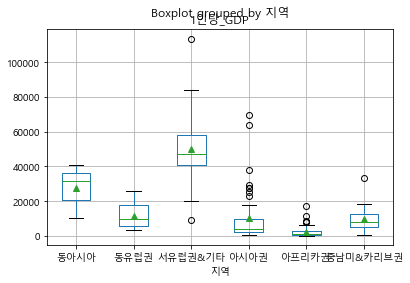

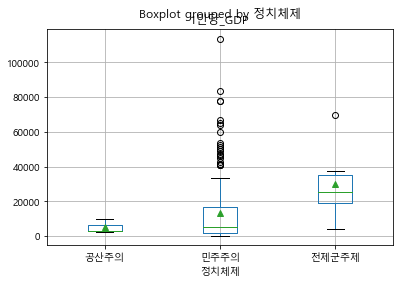

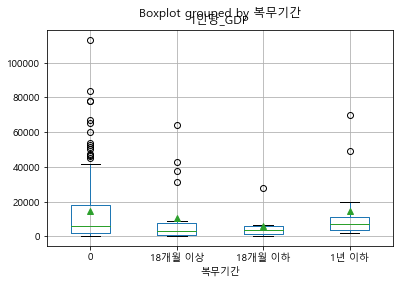

In [38]:
for i in discrete_values:
    viz_disc(i)

- 어느 지역권에 있느냐는 역사,문화,경제적으로 많은 영향을 주고 받았기에 1인당_GDP와 밀접한 관련이 있어보인다.
- 정치체제는 공산국가일수록 가난한 반면 전제군주국일 수록 평균치가 높다. 아마 민주국가의 범위가 넓고 전제군주국 중에는 산유국이 많아서 그런 듯 하지만 여기서는 결과만을 사용하도록 하겠다.
- 반면 복무기간은 큰 관련이 없어보인다.

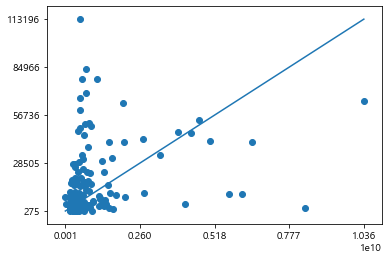

1인당 GDP와 인지도의 상관계수는  0.29673430003550416 입니다.


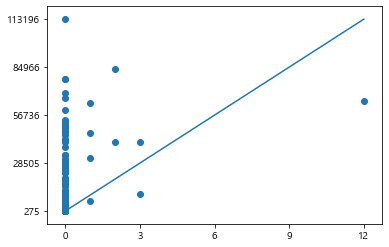

1인당 GDP와 최상위_교육기관_수의 상관계수는  0.28377495588454194 입니다.


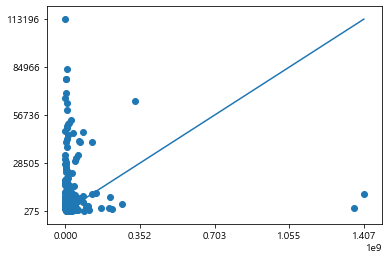

1인당 GDP와 인구의 상관계수는  -0.03638911553048926 입니다.


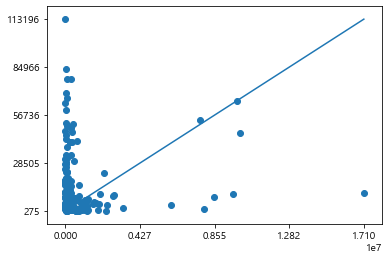

1인당 GDP와 크기의 상관계수는  0.056890324120920974 입니다.


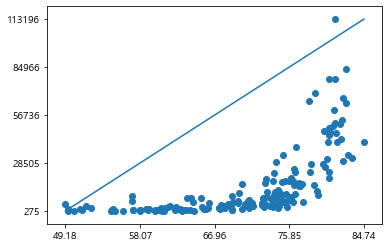

1인당 GDP와 기대수명의 상관계수는  0.6401493033129791 입니다.


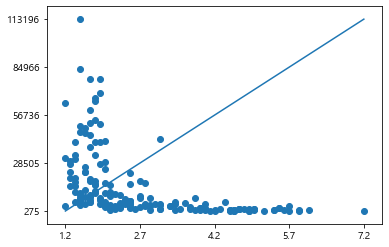

1인당 GDP와 출산율의 상관계수는  -0.48606288670288755 입니다.


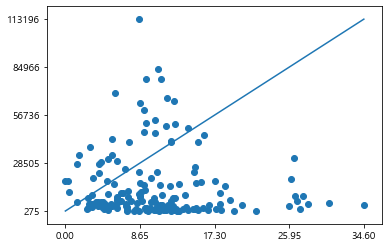

1인당 GDP와 10만명당_자살률의 상관계수는  -0.06777523258018017 입니다.


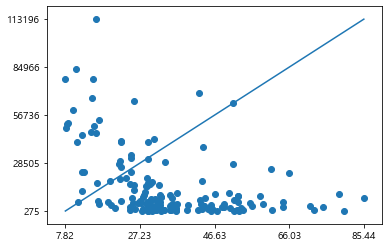

1인당 GDP와 언론자유지수의 상관계수는  -0.421931719174487 입니다.


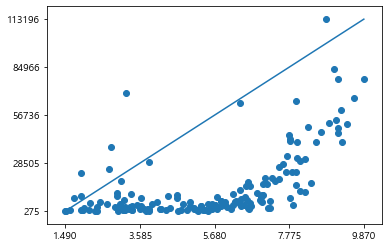

1인당 GDP와 민주주의지수의 상관계수는  0.5868675157418239 입니다.


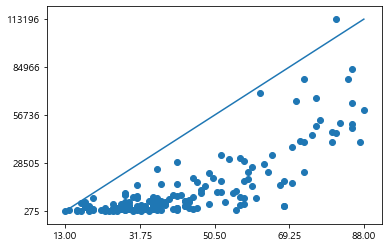

1인당 GDP와 청렴도의 상관계수는  0.7915323370933969 입니다.


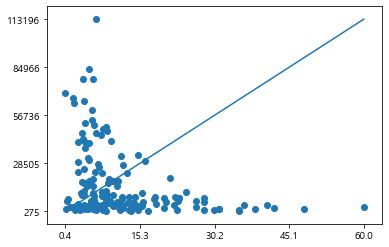

1인당 GDP와 실업률의 상관계수는  -0.318685403664336 입니다.


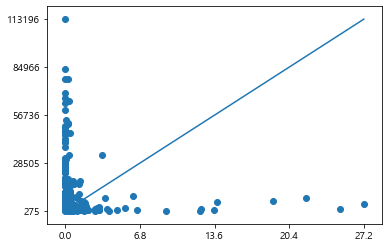

1인당 GDP와 에이즈감염률(%)의 상관계수는  -0.17887414053177159 입니다.


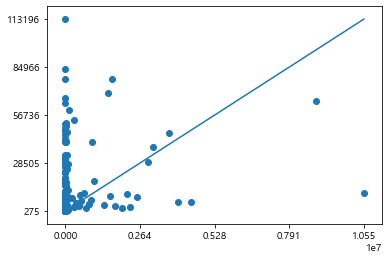

1인당 GDP와 석유생산량의 상관계수는  0.15277831340796355 입니다.


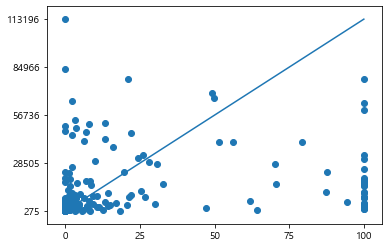

1인당 GDP와 면적 대비 해안선 비율의 상관계수는  0.1555671406342624 입니다.


In [41]:
for i in continuous_values:
    viz_conti(i)

1인당 GDP와 인지도의 상관계수는  0.29673430003550416 입니다.
1인당 GDP와 최상위_교육기관_수의 상관계수는  0.28377495588454194 입니다.
1인당 GDP와 인구의 상관계수는  -0.03638911553048926 입니다.
1인당 GDP와 크기의 상관계수는  0.056890324120920974 입니다.
1인당 GDP와 기대수명의 상관계수는  0.6401493033129791 입니다.
1인당 GDP와 출산율의 상관계수는  -0.48606288670288755 입니다.
1인당 GDP와 10만명당_자살률의 상관계수는  -0.06777523258018017 입니다.
1인당 GDP와 언론자유지수의 상관계수는  -0.421931719174487 입니다.
1인당 GDP와 민주주의지수의 상관계수는  0.5868675157418239 입니다.
1인당 GDP와 청렴도의 상관계수는  0.7915323370933969 입니다.
1인당 GDP와 실업률의 상관계수는  -0.318685403664336 입니다.
1인당 GDP와 에이즈감염률(%)의 상관계수는  -0.17887414053177159 입니다.
1인당 GDP와 석유생산량의 상관계수는  0.15277831340796355 입니다.
1인당 GDP와 면적 대비 해안선 비율의 상관계수는  0.1555671406342624 입니다.


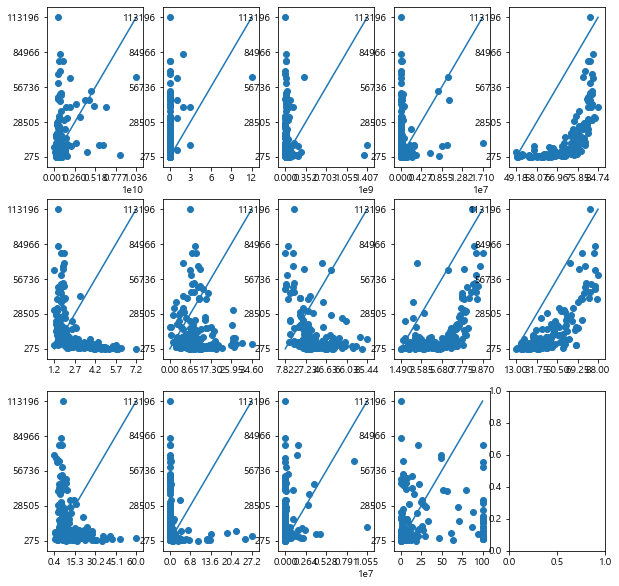

In [43]:
# 위와 똑같은 결과를 간편하게 보여줌

fig,ax = plt.subplots(3,5,figsize=(10,10))
cc= continuous_values+[0]
arr = np.array(cc).reshape(3,5)
y=df['1인당_GDP']
try:
    for i in range(3):
        for j in range(5):
            feature = arr[i,j]
            x=df[feature]
            ax[i,j].plot([x.min(),x.max()],[y.min(),y.max()])
            ax[i,j].scatter(x,y)
            xtic = np.linspace(x.min(),x.max(),5)
            ytic = np.linspace(y.min(),y.max(),5)
            ax[i,j].set_xticks(xtic)
            ax[i,j].set_yticks(ytic)
            print("1인당 GDP와 {}의 상관계수는 ".format(feature),x.corr(y),"입니다.")
except:
    pass

그래프의 각 선은 완벽한 상관관계가 있다 가정했을 때의 기울기이다. <br>
지표들간 양의 상관계수가 클 수록 선을 중심으로 뭉쳐있어야하고<br>
지표들간 음의 상관계수가 클 수록 선과 대칭 모양을 이루어야한다.
- 1인당 GDP와 청렴도,기대수명,민주주의지수와 높은 상관관계가 있다.(0.5이상)
- 1인당 GDP와 인지도,최상위 교육기관 수, 출산율, 언론자유지수, 실업률은 어느 정도 상관관계가 있다.(0.2~0.49)
- 1인당 GDP와 에이즈 감염률, 석유 생산량, 면적 대비 해안선 비율은 상관관계가 별로 없을 것으로 생각된다.(0.1~0.2)
- 1인당 GDP와 인구, 면적, 자살율은 거의 상관관계가 없다.(0.1 이하)

## 빈값 채우기
서로 상관관계가 높은 값들로부터 빈값을 채울 수 있는 insight를 얻을 수도 있으므로 상관관수를 데이터프레임으로 나타낸다.<br>
이산형 자료가 '지역','정치체제','복무기간' 인데 숫자로 나타낼 수 있는 복무기간은 숫자로 바꾸고, '정치체제'는 공산국가,민주주의,전제군주제 순으로 숫자를 매기고, 지역 역시 1인당 GDP가 낮은 지역에서 높은 지역 순으로 숫자를 매긴다.(위의 그래프를 참고했다.)

In [44]:
df2 = df.drop('영문',axis=1)

In [45]:
# discrete_values=['지역','정치체제','복무기간']

print(df2['지역'].unique())
print(df2['정치체제'].unique())
print(df2['복무기간'].unique())


['서유럽권&기타' '아시아권' '동아시아' '중남미&카리브권' '동유럽권' '아프리카권']
['민주주의' '전제군주제' '공산주의']
[0 '1년 이하' '18개월 이상' '18개월 이하']


In [46]:
cond_dict1 = {'아프리카권':0,'아시아권':1,'중남미&카리브권':2,'동유럽권':3,'동아시아':4,'서유럽권&기타':5}
cond_dict2 = {'공산주의':0,'민주주의':1,'전제군주제':2}
cond_dict3 = {0:0,'1년 이하':1, '18개월 이하':2, '18개월 이상':3}

df2['지역'] = df2['지역'].map(cond_dict1)
df2['정치체제'] = df2['정치체제'].map(cond_dict2)
df2['복무기간'] = df2['복무기간'].map(cond_dict3)


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


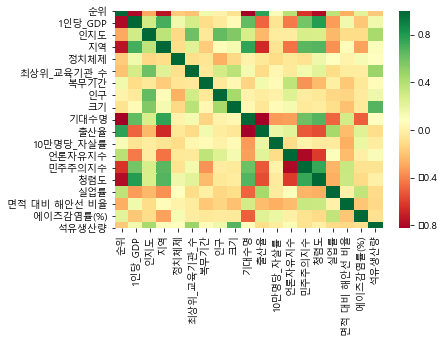

In [47]:
corr = df2.corr()
f, ax = plt.subplots()
sns.heatmap(corr, cmap = 'RdYlGn', ax = ax)

In [48]:
df2.isnull().sum()

순위               0
국가               0
1인당_GDP          0
인지도              0
지역               0
정치체제             0
최상위_교육기관_수       0
복무기간             0
인구               0
크기               0
기대수명             8
출산율             13
10만명당_자살률        8
언론자유지수          18
민주주의지수          25
청렴도             21
실업률             30
면적 대비 해안선 비율     0
에이즈감염률(%)        0
석유생산량            0
dtype: int64

In [49]:
# 상관계수 비교시 순위와 1인당 GDP는 레이블 값에 해당하므로 제외하도록 한다.
# 컬럼에는 null 값이 있는 지표들만 표시한다.

corr[['기대수명','출산율','10만명당_자살률','언론자유지수','민주주의지수','청렴도','실업률']].drop(['순위','1인당_GDP'],axis=0)

,기대수명,출산율,10만명당_자살률,언론자유지수,민주주의지수,청렴도,실업률
인지도,0.279031,-0.233127,-0.019556,-0.014972,0.274324,0.268681,-0.234033
지역,0.762787,-0.670903,-0.067433,-0.444912,0.661406,0.672279,-0.353760
정치체제,0.017567,-0.040356,-0.099996,-0.043504,-0.075503,0.161259,0.093567
최상위_교육기관_수,0.144954,-0.109431,0.033669,-0.034973,0.145811,0.217517,-0.102104
복무기간,-0.132327,0.148277,0.053502,0.361972,-0.351905,-0.228761,-0.007737
인구,0.011785,-0.023306,0.004561,0.242255,-0.015744,-0.044336,-0.124024
크기,0.043559,-0.048734,0.052835,0.140770,-0.033238,-0.022429,-0.092745
기대수명,1.000000,-0.822924,-0.330397,-0.311826,0.612281,0.675006,-0.484888
출산율,-0.822924,1.000000,0.175930,0.222781,-0.517937,-0.560043,0.444667
10만명당_자살률,-0.330397,0.175930,1.000000,-0.102349,0.014819,-0.030582,-0.030024


기대수명은 지역,출산율,청렴도와 큰 상관계수를 갖는다<br>
출산율은 지역,기대수명과 큰 상관계수를 갖는다.<br>
10만명당 자살률은 두드러진 상관관계를 보이지 않는다.<br>
언론자유지수는 민주주의지수와 큰 상관계수를 갖는다.<br>
민주주의지수는 지역,언론자유지수와 큰 상관계수를 갖는다.<br>
청렴도는 지역,기대수명,민주주의지수와 큰 상관계수를 갖는다.<br>
실업률은 두드러진 상관관계를 보이지 않는다.

### 빈값 처리
- 기대수명은 지역을 기준으로 평균값으로 채워준다.
- 민주주의지수 역시 지역을 기준으로 평균값으로 채워준다.
- 출산율은 기대수명을 기준으로 비슷한 나라들의 평균값으로 채워준다.
- 언론자유지수, 청렴도는 민주주의지수 기준으로 비슷한 나라들의 평균값으로 채워준다.
- 실업률은 그나마 상관계수가 좀 있는 기대수명을 기준으로 평균값으로 채워준다.

In [50]:
df2['기대수명'].fillna(df2.groupby('지역')['기대수명'].transform('mean'),inplace=True)
df2['민주주의지수'].fillna(df2.groupby('지역')['민주주의지수'].transform('mean'),inplace=True)

In [51]:
df2[['기대수명','민주주의지수']].isnull().sum()

기대수명      0
민주주의지수    0
dtype: int64

In [52]:
corr = df2.corr()
corr[['기대수명','출산율','10만명당_자살률','언론자유지수','민주주의지수','청렴도','실업률']].drop(['순위','1인당_GDP'],axis=0)

,기대수명,출산율,10만명당_자살률,언론자유지수,민주주의지수,청렴도,실업률
인지도,0.286843,-0.233127,-0.019556,-0.014972,0.272235,0.268681,-0.234033
지역,0.762116,-0.670903,-0.067433,-0.444912,0.673159,0.672279,-0.353760
정치체제,0.016558,-0.040356,-0.099996,-0.043504,-0.081793,0.161259,0.093567
최상위_교육기관_수,0.142337,-0.109431,0.033669,-0.034973,0.144848,0.217517,-0.102104
복무기간,-0.137384,0.148277,0.053502,0.361972,-0.328103,-0.228761,-0.007737
인구,0.011269,-0.023306,0.004561,0.242255,-0.010917,-0.044336,-0.124024
크기,0.040535,-0.048734,0.052835,0.140770,-0.026645,-0.022429,-0.092745
기대수명,1.000000,-0.821401,-0.326025,-0.315715,0.605480,0.677139,-0.470672
출산율,-0.821401,1.000000,0.175930,0.222781,-0.521448,-0.560043,0.444667
10만명당_자살률,-0.326025,0.175930,1.000000,-0.102349,0.008228,-0.030582,-0.030024


- 출산율은 여전히 기대수명과 높은 상관계수를 보인다.
- 언론자유지수, 청렴도 역시 민주주의지수와 여전히 높은 상관계수를 보인다.


중간저장

In [53]:
df2.to_excel('중간과정/second_all.xlsx',index=False)

In [37]:
df = pd.read_excel('중간과정/second_all.xlsx')

In [38]:
# 기대수명의 빈값을 채웠으니 출산율,실업률의 빈값을 채울 기준으로 삼는다.
# 민주주의지수의 빈값을 채웠으니 언론자유지수,청렴도 빈값을 채울 기준으로 삼는다.
# 단, 기대수명과 민주주의지수는 연속형 자료이므로 그대로 groupby를 사용할 수는 없다. 범위를 나눠 구간별로 groupby를 사용하도록 한다.

cat_life = pd.qcut(df['기대수명'],6)
cat_life2 = pd.Categorical(cat_life)
life_interval = cat_life2.codes
print("기대수명의 구간:\n ",cat_life2.categories)


기대수명의 구간:
  IntervalIndex([(49.179, 61.452], (61.452, 68.363], (68.363, 72.69], (72.69, 74.757], (74.757, 78.877], (78.877, 84.74]],
              closed='right',
              dtype='interval[float64]')


In [39]:
cat_democ = pd.qcut(df['민주주의지수'],6)
cat_democ2 = pd.Categorical(cat_democ)
democ_interval = cat_democ2.codes
print("민주주의지수의 구간:\n ",cat_democ2.categories)


민주주의지수의 구간:
  IntervalIndex([(1.489, 3.205], (3.205, 4.398], (4.398, 5.605], (5.605, 6.41], (6.41, 7.768], (7.768, 9.87]],
              closed='right',
              dtype='interval[float64]')


In [40]:
# groupby사용을 위해 임시로 컬럼 추가
df['수명_구간'] = life_interval
df['민주주의지수_구간'] = democ_interval

In [41]:
df['출산율'].fillna(df.groupby('수명_구간')['출산율'].transform('mean'),inplace=True)
df['실업률'].fillna(df.groupby('수명_구간')['실업률'].transform('mean'),inplace=True)

df['언론자유지수'].fillna(df.groupby('민주주의지수_구간')['언론자유지수'].transform('mean'),inplace=True)
df['청렴도'].fillna(df.groupby('민주주의지수_구간')['청렴도'].transform('mean'),inplace=True)


In [42]:
# 임시로 만들었던 컬럼은 다시 제거
df.drop(['민주주의지수_구간','수명_구간'],axis=1,inplace=True)

In [43]:
df.isnull().sum()

순위              0
국가              0
1인당_GDP         0
인지도             0
지역              0
정치체제            0
최상위_교육기관_수      0
복무기간            0
인구              0
크기              0
기대수명            0
출산율             0
10만명당_자살률       8
언론자유지수          0
민주주의지수          0
청렴도             0
실업률             0
면적 대비 해안선 비율    0
에이즈감염률(%)       0
석유생산량           0
dtype: int64

In [35]:
df[df['10만명당_자살률'].isnull()==True]['국가']

14          산마리노
41     세인트키츠 네비스
49           팔라우
74       도미니카 연방
75           나우루
81          세르비아
113        마셜 제도
114          투발루
Name: 국가, dtype: object

In [47]:
# 10만명당_자살률은 어느 지표와도 의미있는 상관관계가 보이지 않는다. 
# 산마리노는 이탈리아, 도미니카 연방은 도미니카 공화국, 세르비아는 몬테네그로, 세인트키츠 네비스는 세인트빈센트 그레나딘,
# 나머지 남태평양 국가들은 미크로네시아 연방의 값을 그대로 사용하기로 한다. 

df.loc[14,'10만명당_자살률'] = 5.4
df.loc[41,'10만명당_자살률'] = 2.6
df.loc[49,'10만명당_자살률'] = 11.2
df.loc[74,'10만명당_자살률'] = 7.3
df.loc[75,'10만명당_자살률'] = 11.2
df.loc[81,'10만명당_자살률'] = 8.7
df.loc[113,'10만명당_자살률'] = 11.2
df.loc[114,'10만명당_자살률'] = 11.2

In [48]:
df.isnull().sum()

순위              0
국가              0
1인당_GDP         0
인지도             0
지역              0
정치체제            0
최상위_교육기관_수      0
복무기간            0
인구              0
크기              0
기대수명            0
출산율             0
10만명당_자살률       0
언론자유지수          0
민주주의지수          0
청렴도             0
실업률             0
면적 대비 해안선 비율    0
에이즈감염률(%)       0
석유생산량           0
dtype: int64

모든 빈값을 채웠다.

중간저장

In [49]:
df.to_excel('중간과정/third_all.xlsx',index=False)